# 1. Imports

In [472]:
#match plots with jupyter theme (delete before delivery)
from jupyterthemes import jtplot
jtplot.style()

In [473]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [474]:
donors = pd.read_csv("Donors_dataset.csv", header=0, na_values="?")

pd.set_option('display.max_columns', None)
donors.head(3)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,NaN,NaN,.,H,M,2.0,0,P,0,NaN,554,294,76,11855,0,0,0,0,1,0,A,1,0.067,15.00,0.000,0.00,1,0,26.0,19,45,297.0,35,8.49,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2.0,45,H,M,7.0,0,P,0,3.0,334,212,72,10385,0,41,21,31,1,1,S,2,0.235,15.00,0.250,15.00,4,2,11.0,32,90,368.0,25,14.72,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1.0,11,H,F,5.0,0,P,0,9.0,2388,405,63,30855,0,25,26,57,1,1,S,3,0.409,21.67,0.545,22.67,9,6,14.0,44,119,603.0,36,16.75,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16


## 2. Understanding Data

In this task you should **understand better the features**, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Very important also is to check the distribution of values in the target (class distribution). 

Here you can find a notebook with some examples of what you can do in **Exploratory Data Analysis**: https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook. You can also use Orange widgets for this.


In [475]:
donors.shape

(19372, 50)

In [476]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   18918 non-null  object 
 7   SES                          18918 non-null  float64
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

There are a total of 19372 entries in the dataset and 50(!) features.

In [477]:
donors.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,SES,INCOME_GROUP,PUBLISHED_PHONE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PER_CAPITA_INCOME,PCT_ATTRIBUTE1,PCT_ATTRIBUTE2,PCT_ATTRIBUTE3,PCT_ATTRIBUTE4,PEP_STAR,RECENT_STAR_STATUS,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_PROM,LIFETIME_GIFT_AMOUNT,LIFETIME_GIFT_COUNT,LIFETIME_AVG_GIFT_AMT,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,18918.000000,14980.000000,19372.000000,19372.000000,10562.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.00000,19372.000000,19372.000000,19126.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,1.903425,3.907543,0.497729,3.361656,5.005397,1079.871929,341.970215,69.698999,15857.334452,1.029011,30.573921,29.603293,32.852467,0.504439,0.931138,1.983998,0.190127,15.365396,0.230808,11.68547,3.043103,1.730539,19.038900,18.668078,47.570514,104.425716,9.979765,12.858338,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,0.749215,1.864796,0.500008,9.503481,2.815386,960.753448,164.207807,21.711019,8710.630390,4.918297,11.421471,15.120360,17.839765,0.499993,2.545585,1.099346,0.113947,10.167485,0.186230,10.83412,2.046401,1.535521,3.415559,8.558778,22.950158,105.722460,8.688163,8.787758,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-12.000000,2.000000,5.000000,15.000000,1.000000,1.360000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,518.000000,232.000000,60.000000,10869.000000,0.000000,25.000000,20.000000,21.000000,0.000000,0.000000,1.000000,0.105000,10.000000,0.100000,5.00000,2.000000,1.000000,17.000000,11.000000,28.000000,42.000000,4.000000,8.000000,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,2.000000,4.000000,0.000000,0.000000,5.000000,747.000000,311.000000,76.000000,13816.500000,0.000000,31.000000,29.000000,32.000000,1.000000,0.000000,2.000000,0.167000,14.000000,0.200000,10.14000,3.000000,1.000000,18.000000,18.000000,47.000000,79.000000,8.000000,11.200000,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,2.000000,5.000000,1.000000,3.000000,7.000000,1227.000000,417.000000,85.000000,18308.250000,0.000000,37.000000,39.000000,43.000000,1.000000,1.000000,3.000000,0.250000,20.000000,0.333000,16.00000,4.000000,2.000000,21.000000,26.000000,64.000000,132.000000,14.000000,15.000000,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,4.000000,7.000000,1.0000

Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each one of the numerical attributes. We will explore the features further ahead in the project, this is just an initial overview.

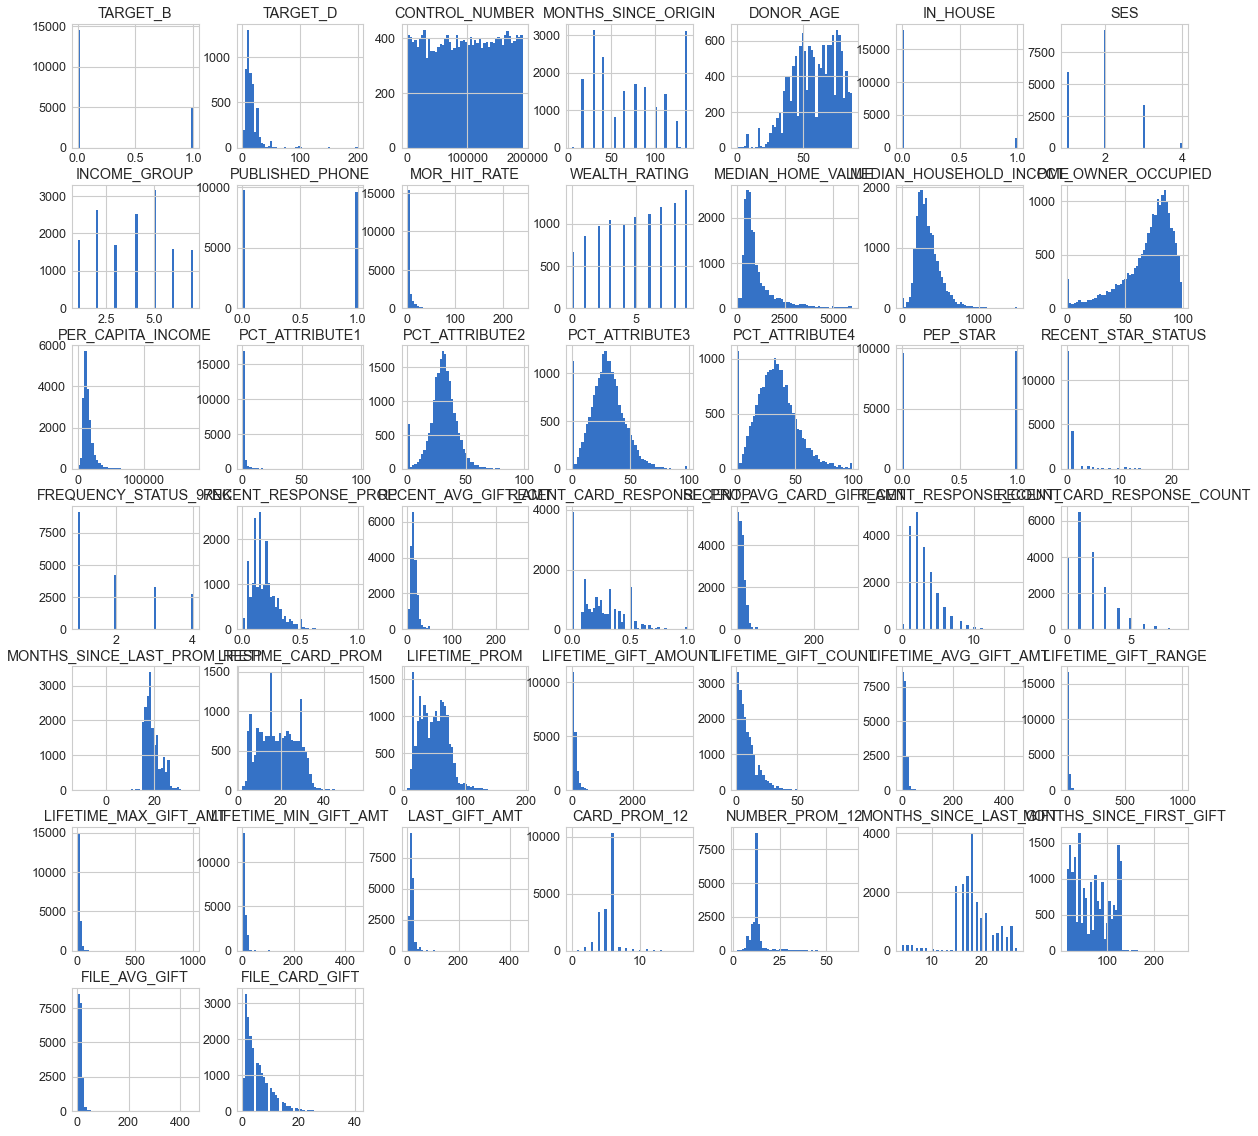

In [478]:
donors.hist(bins=50, figsize=(20,20))
plt.show();

In [479]:
donors.describe(include=np.object)

,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,OVERLAY_SOURCE,RECENCY_STATUS_96NK
count,18918,19372,19372,19372,19372,19372
unique,5,54,2,4,4,6
top,S,40,H,F,B,A
freq,4491,830,10606,10401,8732,11918



After a first look at the dataset and its feature, we can split the variables in two main groups:
+ **Demographic:** these are related to the donor and their demographics. `DONOR_AGE`, `DONOR_GENDER`, `INCOME_GROUP`, `MEDIAN_HOUSEHOLD_INCOME`, `URBANICITY` are some examples of features that pertain to the donor and their social and economic reality.
+ **Donation:** these are related to the donor's donation history and other charity functional features: `PEP_STAR`, `IN_HOUSE`, `PUBLISHED_PHONE`, `FREQUENCY_STATUS_97NK` are some examples of this type.

## 2.1. Checking Duplicated Entries

In [480]:
if donors.shape[0] == len(donors.CONTROL_NUMBER.unique()):
    print('There are no duplicated entries in this dataset.')
else:
    print('There are {} duplicated entries'.format(donors.shape[0] - len(donors.CONTROL_NUMBER.unique())))

There are no duplicated entries in this dataset.


## 2.2. Checking the target variables TARGET_B and TARGET_D 

In [481]:
print("Total number of non-donors (0) = {}, {} percent of total".format(donors[donors['TARGET_B']==0].shape[0], donors[donors['TARGET_B']==0].shape[0]/donors.shape[0]*100))
print("Total number of donors (1) = {}, {} percent of total".format(donors[donors['TARGET_B']==1].shape[0], donors[donors['TARGET_B']==1].shape[0]/donors.shape[0]*100))

Total number of non-donors (0) = 14529, 75.0 percent of total
Total number of donors (1) = 4843, 25.0 percent of total


We can conclude that the data is not balanced; that is, our two target classes from the feature 'TARGET_B', donors (1) and non-donors (0), are not represented equally in the dataset. 
Only a small part of the individuals donated. 
As we will see further ahead in the project, this will imply some restrictions when choosing which performance metrics to measure.

In [482]:
pd.DataFrame(donors['TARGET_D'].value_counts()) #checking the counts of unique values of TARGET_D

,TARGET_D
10.00,941
15.00,591
20.00,577
5.00,503
25.00,392
...,...
16.87,1
101.00,1
13.92,1
5.25,1


In [483]:
pd.DataFrame(donors['TARGET_D'].describe()) #checking some statistical details of TARGET_D

,TARGET_D
count,4843.000000
mean,15.624344
std,12.445137
min,1.000000
25%,10.000000
50%,13.000000
75%,20.000000
max,200.000000


When analysing TARGET_D, we can observe that there were 4843 donations as a response to last year's soliciation, with the mean close to $15.6.

Half of individuals have donated $13 or less, while the max donation summed up to 200 dollars.

## 2.3. Adding DONATION_TYPE to the dataset

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


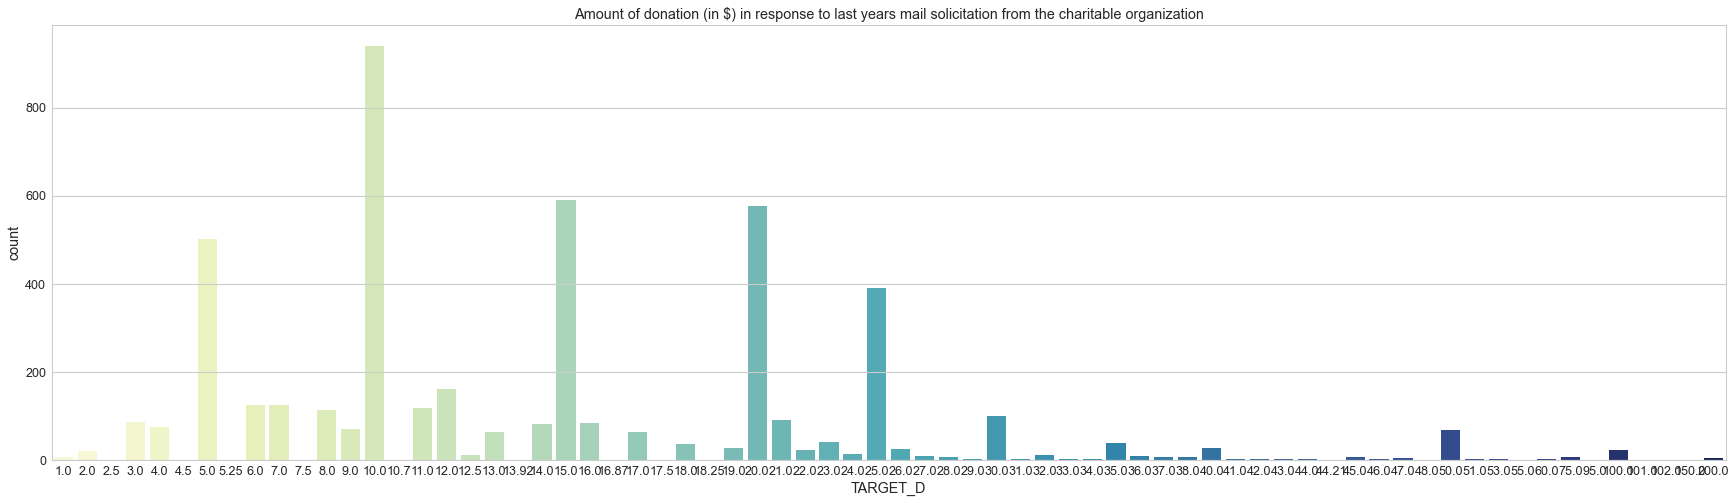

In [484]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
g=sns.countplot(donors['TARGET_D'], palette='YlGnBu')
plt.title('Amount of donation (in $) in response to last years mail solicitation from the charitable organization')
g.figure.set_size_inches(30,8)
plt.show();

In [485]:
donors['TARGET_D'].describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

Based on the data distrubtion, we have taken considered the following cut offs to define a new feature named  `DONATION_TYPE`, whose values describe ranges of the donation amount (DA) reported in feature `TARGET_D` when it takes up a value different that zero, that is, when an individual is a donor:

* `A` - DA >= 50
* `B` - 20 <= DA < 50 
* `C` - 13 <= DA < 20
* `D` - 10 <= DA < 13
* `E` - DA < 10

In [486]:
# creating a list for our classes according to the different threshold donations
thresholds = [
    (donors['TARGET_D']  >= 50),
    (donors['TARGET_D'] < 50) & (donors['TARGET_D']  >= 20),
    (donors['TARGET_D'] < 20) & (donors['TARGET_D']  >= 13),
    (donors['TARGET_D'] < 13) & (donors['TARGET_D']  >= 10),
    (donors['TARGET_D'] < 10)
    ]

# creating a list of the classes
values = ['A', 'B', 'C', 'D', 'E']

# creating a new column, representing an ordinal feature
#using np.select to assign values to DONATION_TYPE using the above lists as arguments
donors['DONATION_TYPE'] = np.select(thresholds, values, default=np.nan)

In [487]:
donors['DONATION_TYPE']

0        nan
1          D
2        nan
3        nan
4        nan
        ... 
19367    nan
19368    nan
19369    nan
19370    nan
19371      A
Name: DONATION_TYPE, Length: 19372, dtype: object

It is important to highlight that when 'DONATION_TYPE' takes up a value different than the classes created above (A,B,C,D,E), it is due to the fact that the individual is a non-donor.

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


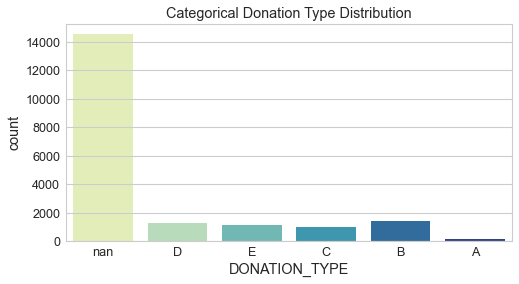

In [488]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.countplot(donors['DONATION_TYPE'], palette='YlGnBu')
plt.xlabel('DONATION_TYPE')
plt.title('Categorical Donation Type Distribution')
plt.show();

atenção

We had already known that we were dealing with an imbalanced dataset (75% non-donors represented by the 'nan' column), the above bar chart highlights the high value donations >= 50 dollars were the least common in last year's donation.

## 2.4. Missing Values

In [489]:
na_found=donors.isna().sum().any()
if na_found==True:
    total_na = donors.isnull().sum()
    percent_na = round(donors.isnull().sum()/donors.isnull().count()*100,5)
    donors_df2 = pd.concat([percent_na, total_na], axis=1, keys=["% of NA", "Total NA"])
    dtypes = []
    for i in donors.columns:
        dtype = str(donors[i].dtype)
        dtypes.append(dtype)
    donors_df2['Type'] = dtypes
    donors_df2 = donors_df2.sort_values('% of NA', ascending=False)
donors_df2

,% of NA,Total NA,Type
TARGET_D,75.00000,14529,float64
WEALTH_RATING,45.47801,8810,float64
DONOR_AGE,24.75222,4795,float64
INCOME_GROUP,22.67190,4392,float64
URBANICITY,2.34359,454,object
SES,2.34359,454,float64
MONTHS_SINCE_LAST_PROM_RESP,1.26987,246,float64
TARGET_B,0.00000,0,int64
LIFETIME_AVG_GIFT_AMT,0.00000,0,float64
RECENT_AVG_CARD_GIFT_AMT,0.00000,0,float64


Seven features were found to have missing values. It is important to highlight that the target variable TARGET_D has a considerable number of NAs, totalling 75% of the observations - as confirmed previously, this is due to the fact that 75% of individuals have not donated, hence their amount of donation does not exist.

Additionally,  `WEALTH_RATING`, `INCOME_GROUP`, `SES`, `DONOR_AGE` and `URBANICITY` all have a high number of NA values, with the first three being the most problematic as the percentage of missing entries is above 20 %.

For different features, we will find different imputation methods.

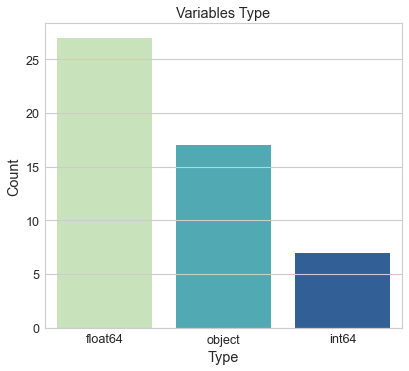

In [490]:
#feature type distribution
fig,ax = plt.subplots()
sns.barplot(data=donors_df2,x=donors_df2.Type.unique(), y=donors_df2.Type.value_counts(),ax=ax, palette='YlGnBu')
ax.set(xlabel='Type', ylabel='Count',title="Variables Type");

In [491]:
 list(donors.columns[donors.isnull().any()]) #getting a list of features with missing values

['TARGET_D',
 'DONOR_AGE',
 'URBANICITY',
 'SES',
 'INCOME_GROUP',
 'WEALTH_RATING',
 'MONTHS_SINCE_LAST_PROM_RESP']

   - Let's start with `DONOR_AGE`, we can impute the median for this variable for every NA as it does not affect the variable distribution. 

In [492]:
ageMedian = donors["DONOR_AGE"].median()
donors["DONOR_AGE"] = donors["DONOR_AGE"].fillna(ageMedian)
donors["DONOR_AGE"].isnull().sum()

0

In [493]:
donors['DONOR_AGE']=donors['DONOR_AGE'].astype('int64')

   - Next we take a look at `INCOME_GROUP` and `WEALTH_RATING`, which are both categorical variables.

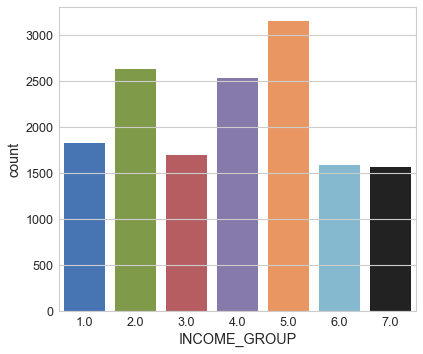

In [494]:
sns.countplot(x=donors['INCOME_GROUP'])
plt.show()

In [495]:
donors['INCOME_GROUP'].value_counts(normalize=True) * 100

5.0    21.021362
2.0    17.530040
4.0    16.862483
1.0    12.162884
3.0    11.341789
6.0    10.620828
7.0    10.460614
Name: INCOME_GROUP, dtype: float64

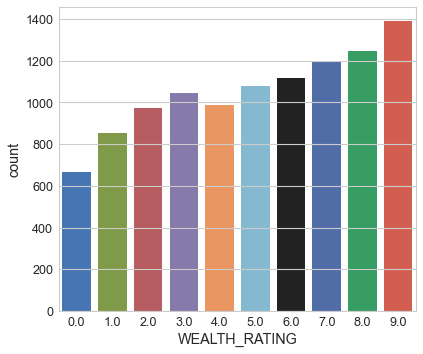

In [496]:
sns.countplot(x=donors['WEALTH_RATING'])
plt.show()

In [497]:
donors['WEALTH_RATING'].value_counts(normalize=True) * 100

9.0    13.160386
8.0    11.815944
7.0    11.352017
6.0    10.575649
5.0    10.206400
3.0     9.903427
4.0     9.344821
2.0     9.221738
1.0     8.085590
0.0     6.334028
Name: WEALTH_RATING, dtype: float64

One way to treat these missing values would be to impute the mode to all missing values of these two features. However, as the number of missing values are too high, this would severely impact the dataset and skew the observations towards the most frequent class.
In this case, the mode would refer to classes 5 and 9, for `INCOME_GROUP` and `WEALTH_RATING` respectively.

We also can't just remove the rows with NA values because that would cut almost half of the dataset. A possible solution would be to evaluate if these two features are needed. There could be features that show the same type of information as these two. In this case, we are looking at features that convey economic information about the donors.

Looking at the dataset, that are other features which represent economic data: `PER_CAPITA_INCOME`, `MEDIAN_HOUSEHOLD_INCOME` and `SES`. It can be interesting to look at the correlation between `WEALTH_RATING` and `INCOME_GROUP` and these features.

In [498]:
donors.corrwith(donors["WEALTH_RATING"]).sort_values(ascending=False).head()

WEALTH_RATING              1.000000
MEDIAN_HOUSEHOLD_INCOME    0.603792
PER_CAPITA_INCOME          0.521337
INCOME_GROUP               0.419194
MEDIAN_HOME_VALUE          0.390796
dtype: float64

In [499]:
donors.corrwith(donors["INCOME_GROUP"]).sort_values(ascending=False).head()

INCOME_GROUP               1.000000
MEDIAN_HOUSEHOLD_INCOME    0.428270
WEALTH_RATING              0.419194
PER_CAPITA_INCOME          0.354530
MEDIAN_HOME_VALUE          0.323530
dtype: float64

We have observed that both  `INCOME_GROUP` and `WEALTH_RATING` are positively correlated with the economic features.
We will assume that both of these two features were generated to represent groups based on data from the economic features and, as such, we can remove them from the dataset and still keep the information that these two features convey.

In [500]:
donors = donors.drop(["INCOME_GROUP", "WEALTH_RATING"], axis=1)

   - Moving on to `MONTHS_SINCE_LAST_PROM_RESP`, we'd observed before in the dataset describe method that this feature had negative values. From the dataset description we can see that this feature represents the number of months since the donor's last response. That means that there shouldn't be any negative values.

In [501]:
donors["MONTHS_SINCE_LAST_PROM_RESP"].describe()

count    19126.000000
mean        19.038900
std          3.415559
min        -12.000000
25%         17.000000
50%         18.000000
75%         21.000000
max         36.000000
Name: MONTHS_SINCE_LAST_PROM_RESP, dtype: float64

We should see how many negative values there are.

In [502]:
negSum = 0
for val in donors["MONTHS_SINCE_LAST_PROM_RESP"]:
    if val < 0:
        negSum += 1
print("There are", str(negSum), "negative values in this feature!")

There are 8 negative values in this feature!


In [503]:
donors[donors['MONTHS_SINCE_LAST_PROM_RESP']<0].LIFETIME_CARD_PROM

203      34
5214     17
5807     19
6682     15
8343     15
9601     32
10391    31
13456    18
Name: LIFETIME_CARD_PROM, dtype: int64

There are 8 negative values in `MONTHS_SINCE_LAST_PROM_RESP`. 

After checking `LIFETIME_CARD_PROM`, we confirmed that the entries which had a negative value of `MONTHS_SINCE_LAST_PROM_RESP` actually had positive values representing the total number of card promotions sent to the individual by the charitable organization. With this, we could discard the idea that those individuals had been first time donors.

As such, we will assume that these are due to low quality data inputation and we will regard them as errors, replacing them by the feature's median: 18.

In [504]:
monthMedian = donors["MONTHS_SINCE_LAST_PROM_RESP"].median()
monthMedian

18.0

In [505]:
donors["MONTHS_SINCE_LAST_PROM_RESP"] = donors["MONTHS_SINCE_LAST_PROM_RESP"].fillna(monthMedian)

In [506]:
donors["MONTHS_SINCE_LAST_PROM_RESP"].isnull().sum()

0

+ `MEDIAN_HOME_VALUE`: We had previously identified a problem with this feature, where it was equal to 0 in some observations. Because a home always has a non-zero value (unless the person who is donated is homeless, which does not seem likely), we will have to treat these values. We will do what we did before for the missing values and replace these ones with the median for this feature.

In [507]:
donors["MEDIAN_HOME_VALUE"] = np.where((donors["MEDIAN_HOME_VALUE"] == 0), 
                                       donors['MEDIAN_HOME_VALUE'].median(), 
                                       donors["MEDIAN_HOME_VALUE"])
donors['MEDIAN_HOME_VALUE'].describe()

count    19372.000000
mean      1088.278185
std        954.515594
min         75.000000
25%        529.000000
50%        747.000000
75%       1227.000000
max       6000.000000
Name: MEDIAN_HOME_VALUE, dtype: float64

   - For `SES` and `URBANICITY`, we have chosen to replace the missing values by the most common class for each feature. 

In [508]:
donors['SES'].value_counts()

2.0    9284
1.0    5924
3.0    3323
4.0     387
Name: SES, dtype: int64

In [509]:
donors['SES'] = donors['SES'].fillna(donors['SES'].mode()[0])

In [510]:
donors["SES"].isnull().sum()

0

In [511]:
donors['URBANICITY'].value_counts()

S    4491
C    4022
R    4005
T    3944
U    2456
Name: URBANICITY, dtype: int64

In [512]:
donors['URBANICITY'] = donors['URBANICITY'].fillna(donors['URBANICITY'].mode()[0])

In [513]:
donors["SES"].isnull().sum()

0

   - Finally, for TARGET_D, we will first verify if all the null values are indeed from non-donors.

In [514]:
donors[donors["TARGET_B"]==1]["TARGET_D"].isnull().sum()

0

Having confirmed this assumption, we can input missing values with zero. If someone didn't donate then TARGET_B = 0 and, obviously, TARGET_D = 0. Also, if someone has a non-null value for TARGET_D then TARGET_B is 1.

In [515]:
donors["TARGET_D"] = donors["TARGET_D"].fillna(0)

In [516]:
donors["TARGET_D"].isnull().sum()

0

In [517]:
donors.columns[donors.isnull().any()] #sanity check

Index([], dtype='object')

## 2.5. Correcting data types

In [518]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     19372 non-null  float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    19372 non-null  int64  
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  float64
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  PUBLISHED_PHONE              19372 non-null  int64  
 12  OVERLAY_SOURCE               19372 non-null  object 
 13  MOR_HIT_RATE    

With the features' description in mind, we can identify some problems with the datatypes :
+ `TARGET_B`, `IN_HOUSE`, `PUBLISHED_PHONE`, `PEP_STAR`, `RECENT_STAR_STATUS`  are objects, not ints.
+ `DONOR_AGE` and `MONTHS_SINCE_LAST_PROM_RESP` should be an int and not a float.
+ `SES` and `INCOME_GROUP` are categories and should be an object (not a float).
+ `FREQUENCY_STATUS_97NK` accounts for the number of donations in a certain time period but there are only 4 different values. We should treat this feature as a caregory (not an int)

We can also convert all object types to category.

In [519]:
# float to int
toInt = ['DONOR_AGE', 'MONTHS_SINCE_LAST_PROM_RESP', 'SES', 'INCOME_GROUP']
for col in donors.columns:
    if col in toInt:
        donors[col] = donors[col].astype(np.int64)

# int to category
toCat = ["SES", "INCOME_GROUP", "TARGET_B", "IN_HOUSE", "PUBLISHED_PHONE", "PEP_STAR", 
         "RECENT_STAR_STATUS", "FREQUENCY_STATUS_97NK"]
for col in donors.columns:
    if col in toCat:
        donors[col] = pd.Categorical(donors[col])
        
# object to category
objtoCat = ["URBANICITY", "CLUSTER_CODE", "HOME_OWNER", "DONOR_GENDER", "OVERLAY_SOURCE", 
            "RECENCY_STATUS_96NK", "DONATION_TYPE"]
for col in donors.columns:
    if col in objtoCat:
        donors[col] = pd.Categorical(donors[col])

In [520]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   TARGET_B                     19372 non-null  category
 1   TARGET_D                     19372 non-null  float64 
 2   CONTROL_NUMBER               19372 non-null  int64   
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64   
 4   DONOR_AGE                    19372 non-null  int64   
 5   IN_HOUSE                     19372 non-null  category
 6   URBANICITY                   19372 non-null  category
 7   SES                          19372 non-null  category
 8   CLUSTER_CODE                 19372 non-null  category
 9   HOME_OWNER                   19372 non-null  category
 10  DONOR_GENDER                 19372 non-null  category
 11  PUBLISHED_PHONE              19372 non-null  category
 12  OVERLAY_SOURCE               19372 non-null  category
 13  M

## 2.6. Dropping Features

Looking at the features' descriptions, we can immediately point out some that are meaningless for the problem at hand and, hence, will be dropped:

- CONTROL_NUMBER: this is a unique identifier for each donor, it has no impact in the donation.
- OVERLAY_SOURCE: we will assume that the data source is not relevant for the prediction.
- FILE_AVG_GIFT: this feature is identical to LIFETIME_AVG_GIFT_AMT, according to the dataset info.
- PEP_STAR: which takes up value 1 if the donor has a STAR status and 0 otherwise will be removed as this information is already displayed in the feature 'RECENCY_STATUS_96NK' by the class S and by the remaining ones, respectively.
- RECENT_STAR_STATUS: which takes up value 1 if the donor has reached STAR status 4 years ago and 0 otherwise will be removed as this information is already displayed in the feature 'RECENCY_STATUS_96NK' by the class S and by the remaining ones, respectively.
- CLUSTER_CODE: There are 54 unique values for this variable.Given that this feature reflects socioeconomic status, urbanicity, ethnicity, and other demographic characteristics, we consider that such information is already reflected in other features of this dataset so we will drop it.
- NUMBER_PROM_12: the data illustrated in this feature is already represented by the feature 'CARD_PROM_12'
- PCT_ATTRIBUTE3 and PCT_ATTRIBUTE4: these features show the % of veterans of WWII and Vietnam in the neighborhood where the donor lives. However, the % of all veterans is already in PCT_ATTRIBUTE2. This means these features are redundant and should be dropped. Also, we should rename PCT_ATTRIBUTE1 and 2 to something more clear: 1 to PCT_MILITARY and 2 to PCT_VETERANS

In [521]:
donors=donors.drop(['CONTROL_NUMBER', 'OVERLAY_SOURCE', 'FILE_AVG_GIFT', 'PEP_STAR', 
                    'RECENT_STAR_STATUS', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4'],axis=1)

In [522]:
donors=donors.drop(['CLUSTER_CODE'], axis=1)

In [523]:
donors=donors.drop(['NUMBER_PROM_12'], axis=1)

In [524]:
donors=donors.rename(columns = {'PCT_ATTRIBUTE1':'PCT_MILITARY', 'PCT_ATTRIBUTE2':'PCT_VETERANS'})

We will also look for correlations in the data set and, after analysing pairs of features with a positively high standard correlation coefficient, we have chosen to remove the following features:

- 'MONTHS_SINCE_ORIGIN'
- 'LIFETIME_PROM_CARD'
- 'PER_CAPITA_INCOME'
- 'LIFETIME_GIFT_COUNT'
- 'LIFETIME_MAX_GIFT_AMT'
- 'LIFETIME_MIN_GIFT_AMT'
- 'LIFETIME_GIFT_RANGE'
- 'LIFETIME_PROM'
- 'RECENT_RESPONSE_COUNT'
- 'LIFETIME_GIFT_AMOUNT'

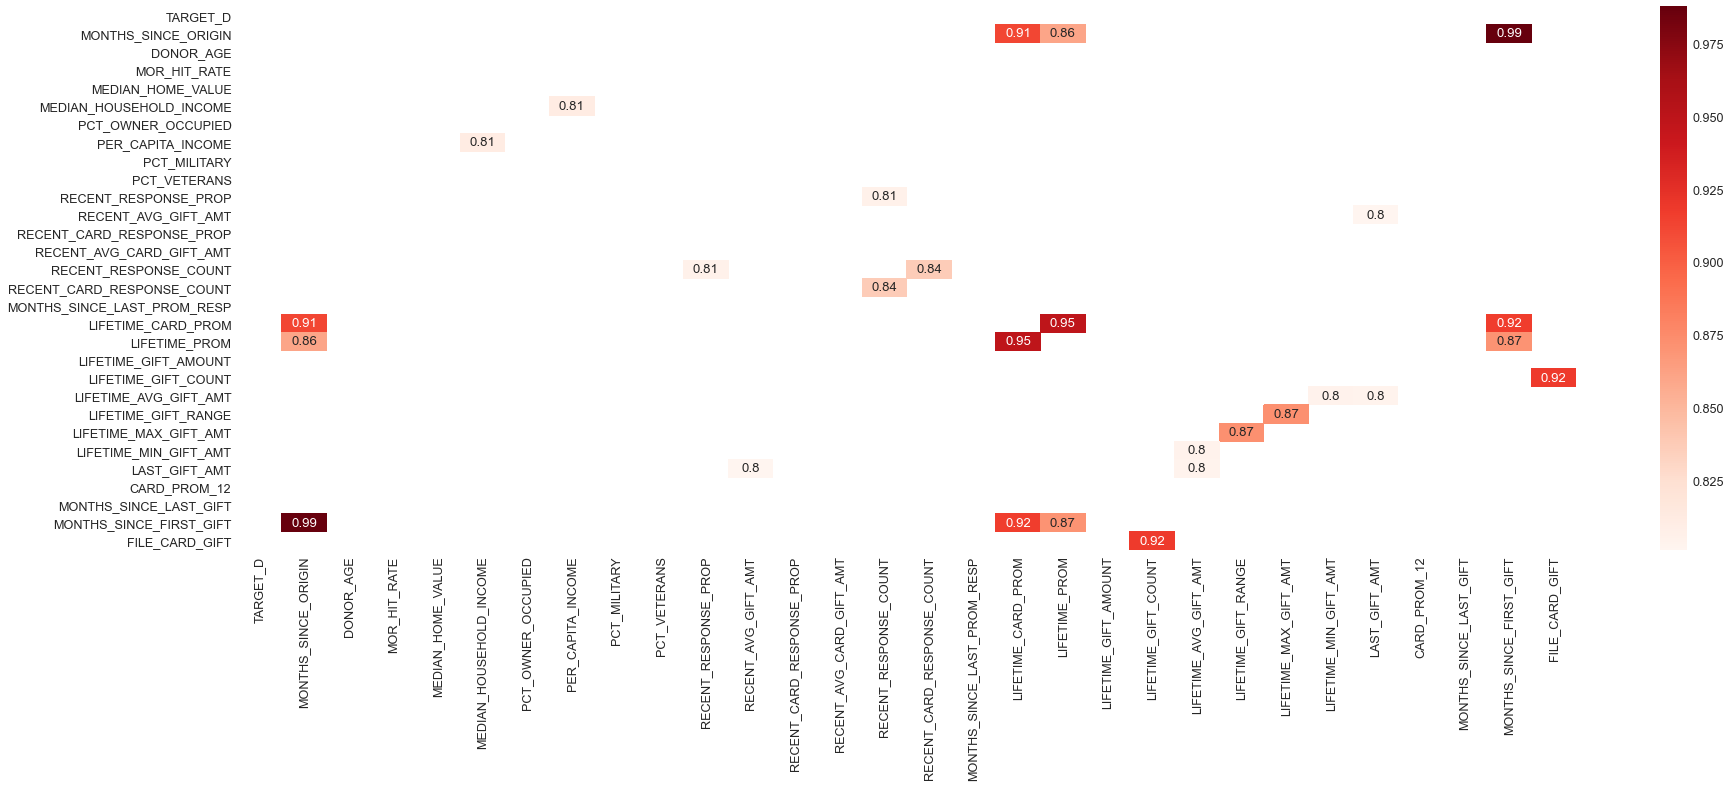

In [525]:
donors_matrix = donors.corr()
filtered_donors = donors_matrix[((donors_matrix >= .8) | (donors_matrix <= -.8)) & (donors_matrix !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filtered_donors, annot=True, cmap="Reds")

plt.show()

In [526]:
filtered_donors.unstack().sort_values().drop_duplicates()

RECENT_AVG_GIFT_AMT      LAST_GIFT_AMT                 0.801052
LAST_GIFT_AMT            LIFETIME_AVG_GIFT_AMT         0.803911
LIFETIME_AVG_GIFT_AMT    LIFETIME_MIN_GIFT_AMT         0.804668
RECENT_RESPONSE_PROP     RECENT_RESPONSE_COUNT         0.805832
MEDIAN_HOUSEHOLD_INCOME  PER_CAPITA_INCOME             0.811624
RECENT_RESPONSE_COUNT    RECENT_CARD_RESPONSE_COUNT    0.836973
MONTHS_SINCE_ORIGIN      LIFETIME_PROM                 0.860342
MONTHS_SINCE_FIRST_GIFT  LIFETIME_PROM                 0.870775
LIFETIME_MAX_GIFT_AMT    LIFETIME_GIFT_RANGE           0.871837
MONTHS_SINCE_ORIGIN      LIFETIME_CARD_PROM            0.912063
LIFETIME_CARD_PROM       MONTHS_SINCE_FIRST_GIFT       0.916866
LIFETIME_GIFT_COUNT      FILE_CARD_GIFT                0.918308
LIFETIME_PROM            LIFETIME_CARD_PROM            0.948653
MONTHS_SINCE_ORIGIN      MONTHS_SINCE_FIRST_GIFT       0.987825
TARGET_D                 TARGET_D                           NaN
dtype: float64

In [527]:
donors = donors.drop(['MONTHS_SINCE_ORIGIN','LIFETIME_CARD_PROM','PER_CAPITA_INCOME','LIFETIME_GIFT_COUNT',
 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
 'LIFETIME_GIFT_RANGE','LIFETIME_PROM', 'RECENT_RESPONSE_COUNT'], axis=1)

In [528]:
donors = donors.drop(['LIFETIME_GIFT_AMOUNT'], axis=1)

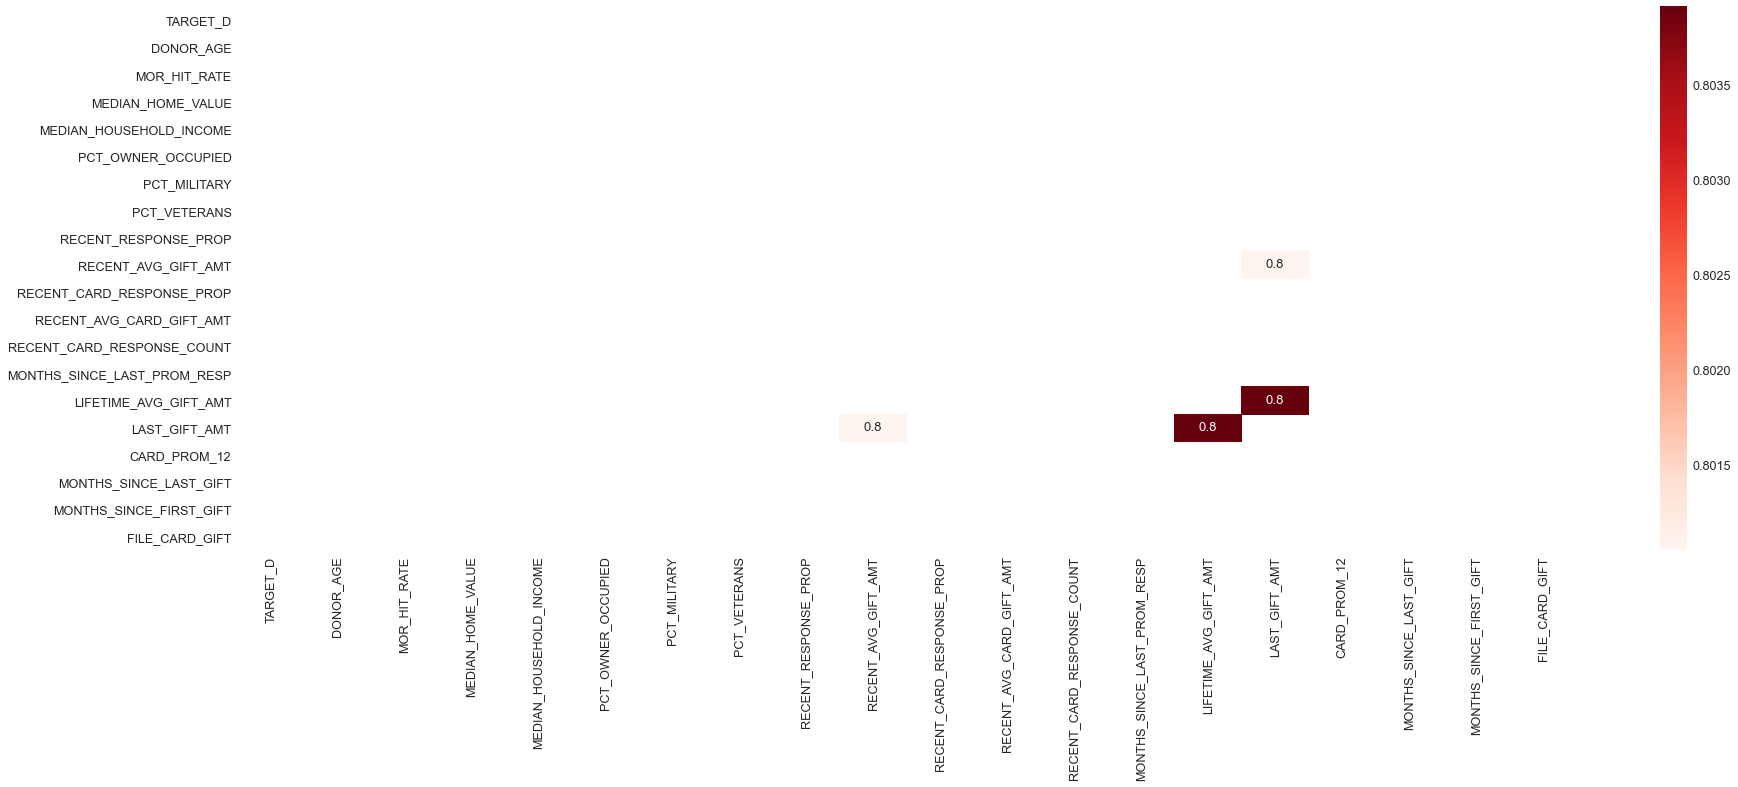

In [529]:
donors_matrix = donors.corr()
filtered_donors = donors_matrix[((donors_matrix >= .8) | (donors_matrix <= -.8)) & (donors_matrix !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filtered_donors, annot=True, cmap="Reds")

plt.show()

Two highly correlated pairs (corr > 0.8) remain: `RECENT_AVG_GIFT_AMT`-`LAST_GIFT_AMT` and `LAST_GIFT_AMT`-`LIFETIME_AVG_GIFT_AMT`. However, despite the correlation being high, we can't really remove one of them as the information present in each feature is not redundant, that is, there is information that one of these features alone cannot explain. As such, we will leave these 3 features in the dataset.

# 3. Exploring Data

- Numerical Attributes

In [530]:
donors.describe()

,TARGET_D,DONOR_AGE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT
count,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.00000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,3.906086,59.186610,3.361656,1088.278185,341.970215,69.698999,1.029011,30.573921,0.190127,15.365396,0.230808,11.68547,1.730539,19.025707,12.858338,16.584199,5.367128,18.191152,69.482088,5.273591
std,9.191804,14.467337,9.503481,954.515594,164.207807,21.711019,4.918297,11.421471,0.113947,10.167485,0.186230,10.83412,1.535521,3.395795,8.787758,11.977558,1.264205,4.033065,37.568169,4.607063
min,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-12.000000,1.360000,0.000000,0.000000,4.000000,15.000000,0.000000
25%,0.000000,51.000000,0.000000,529.000000,232.000000,60.000000,0.000000,25.000000,0.105000,10.000000,0.100000,5.00000,1.000000,17.000000,8.000000,10.000000,5.000000,16.000000,33.000000,2.000000
50%,0.000000,60.000000,0.000000,747.000000,311.000000,76.000000,0.000000,31.000000,0.167000,14.000000,0.200000,10.14000,1.000000,18.000000,11.200000,15.000000,6.000000,18.000000,65.000000,4.000000
75%,0.250000,69.000000,3.000000,1227.000000,417.000000,85.000000,0.000000,37.000000,0.250000,20.000000,0.333000,16.00000,2.000000,21.000000,15.000000,20.000000,6.000000,20.000000,105.000000,8.000000
max,200.000000,87.000000,241.000000,6000.000000,1500.000000,99.000000,97.000000,99.000000,1.000000,260.000000,1.000000,300.00000,9.000000,36.000000,450.000000,450.000000,17.000000,27.000000,260.000000,41.000000


In [531]:
len(donors.FILE_CARD_GIFT.value_counts())

32

According to the statistics below, it seems that the average amount of the most recent donation was 1 dollar higher than the current one (16.6 dollars vs 15.6 dollars). In the last campaign, 50% of the individuals donated at least 15 dollars whereas on this current one half of the individuals donated less than 13 dollars.

In [532]:
donors.loc[donors.LAST_GIFT_AMT !=0].LAST_GIFT_AMT.describe()

count    19297.000000
mean        16.648655
std         11.956016
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max        450.000000
Name: LAST_GIFT_AMT, dtype: float64

In [533]:
donors.loc[donors.TARGET_D !=0].TARGET_D.describe()

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

In [534]:
print('Individuals who had already contributed on average with at least $15 in their lifetime, contributed a total of ${} for this donation, representing {} % of the total donated amount'.format(
    donors.loc[(donors.LIFETIME_AVG_GIFT_AMT >=15)].TARGET_D.sum(), np.round(donors.loc[(donors.LIFETIME_AVG_GIFT_AMT >=15)].TARGET_D.sum()/donors.TARGET_D.sum(),2)*100))

print('Individuals who had already contributed on average with less than $15 in their lifetime, contributed a total of ${} for this donation, representing {} % of the total donated amount'.format(
    donors.loc[(donors.LIFETIME_AVG_GIFT_AMT <15)].TARGET_D.sum(), np.round(donors.loc[(donors.LIFETIME_AVG_GIFT_AMT <15)].TARGET_D.sum()/donors.TARGET_D.sum(),2)*100))

Individuals who had already contributed on average with at least $15 in their lifetime, contributed a total of $30069.03 for this donation, representing 40.0 % of the total donated amount
Individuals who had already contributed on average with less than $15 in their lifetime, contributed a total of $45599.67 for this donation, representing 60.0 % of the total donated amount


In [535]:
print('Individuals who donated lived on avg in more expensive properties, with the mean house value being ${} above those who did not donate.'.format(
np.round(donors.loc[(donors.TARGET_B==1)].MEDIAN_HOME_VALUE.mean()-donors.loc[(donors.TARGET_B==0)].MEDIAN_HOME_VALUE.mean(),2)*100))

Individuals who donated lived on avg in more expensive properties, with the mean house value being $10920.0 above those who did not donate.


In [536]:
print('On average, neighbourhoods with the majority of owner-occupied housing donated ${} less than those who lived in other neighbourhood.'.format(
np.abs(np.round(donors.loc[(donors.TARGET_B==1)&(donors.PCT_OWNER_OCCUPIED >=0.5)].TARGET_D.mean()-donors.loc[(donors.TARGET_B==1)&(donors.PCT_OWNER_OCCUPIED <0.5)].TARGET_D.mean(),2))))

On average, neighbourhoods with the majority of owner-occupied housing donated $0.73 less than those who lived in other neighbourhood.


In [537]:
print("The donors' household income was on avg ${}, which was ${} above those who did not donate.".format(
      np.round(donors.loc[(donors.TARGET_B==1)].MEDIAN_HOME_VALUE.mean()*100),
np.round(donors.loc[(donors.TARGET_B==1)].MEDIAN_HOME_VALUE.mean()-donors.loc[(donors.TARGET_B==0)].MEDIAN_HOME_VALUE.mean(),2)*100))

The donors' household income was on avg $117018.0, which was $10920.0 above those who did not donate.


In [538]:
print("Donors had their first donation on average 6 years prior and during that time they donated ${} on avg each time.".format(
    np.round(donors.loc[(donors.TARGET_B==1)].MOR_HIT_RATE.mean(),2)))
print("For this donation the average was higher (${})".format(np.round(donors.loc[(donors.TARGET_B==1)].TARGET_D.mean(),2)))

Donors had their first donation on average 6 years prior and during that time they donated $3.57 on avg each time.
For this donation the average was higher ($15.62)


In [539]:
#list of numerical variables in the dataset
donors_num = ['CARD_PROM_12','DONOR_AGE','FILE_CARD_GIFT',
                    'LAST_GIFT_AMT','LIFETIME_AVG_GIFT_AMT','MEDIAN_HOME_VALUE',
                    'MEDIAN_HOUSEHOLD_INCOME','MONTHS_SINCE_FIRST_GIFT',
                    'MOR_HIT_RATE', 'RECENT_AVG_CARD_GIFT_AMT','RECENT_AVG_GIFT_AMT',
                    'RECENT_CARD_RESPONSE_COUNT','RECENT_CARD_RESPONSE_PROP','RECENT_RESPONSE_PROP']

+ **MOR_HIT_RATE**

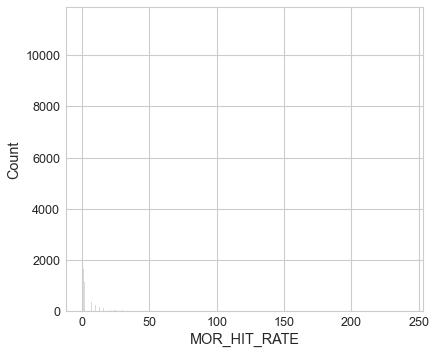

In [540]:
sns.histplot(donors['MOR_HIT_RATE'])
plt.show()

It seems that the vast majority of observations for this feature equals 0. It might be a good idea to transform this feature into a category and redefine its definition to:
+ `MOR_HIT_RATE`: equal to 1 if the person has responded to another organization's mail, 0 if they haven't.

In [541]:
donors["MOR_HIT_RATE"] = np.where((donors["MOR_HIT_RATE"] != 0), "1", donors["MOR_HIT_RATE"])
donors["MOR_HIT_RATE"] = pd.Categorical(donors["MOR_HIT_RATE"])
donors["MOR_HIT_RATE"].unique()

['0', '1']
Categories (2, object): ['0', '1']

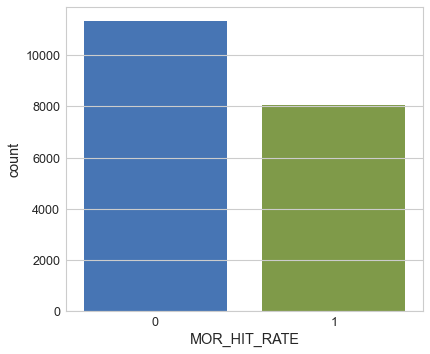

In [542]:
sns.countplot(x=donors['MOR_HIT_RATE'])
plt.show()

Just like we saw with `MEDIAN_HOME_VALUE`, there are other numerical values where 0 values might not make sense: `DONOR_AGE` and `MEDIAN_HOUSEHOLD_INCOME`. However, for these 2 features, we will not assume that this values are errors, as there are some instances where they might be correct:
+ For `DONOR_AGE`, the donation could have been done in the name of a baby or a newborn.
+ For `MEDIAN_HOUSEHOLD_INCOME`, the donors could have been unemployed and, obviously, not have any income.

These are 2 special cases that need further evaluation. It might be worth it to further explore these possibilities 

+ **DONOR_AGE**

In [543]:
donors[donors.DONOR_AGE == 0]

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
8967,0,0.0,0,0,S,2,U,M,1,0,1083.0,374,72,0,27,A,3,0.250,14.0,0.375,14.33,3,21,11.0,14.0,6,21,75,4,nan
13698,0,0.0,0,0,C,1,H,M,1,1,705.0,266,97,0,42,A,3,0.222,35.5,0.222,35.00,2,18,24.0,37.0,6,18,127,6,nan


There are only 2 observations where the donor's age is 0. However, contrary to the justifications we presented before, it doesn't seem to be the case of someone donating in the name of a child:

+ Donor 8967 seems to have donated for the first time 75 months ago. Even if the first donation was done in the name of a child, there is no way the age would be the same after these 75 months. So, we conclude that this is a mistake in the data.
+ Donor 13698 is listed as a homeowner. Even if the donation was done in the name of a child, there is no way that donor would be a homeowner. Also, its first donation was done 127 months ago. With this, we conclude that this age value is also a mistake.

With these two conclusions, we will have to find a way to correct these mistakes. We will do the same process we did for the missing values, replacing the `DONOR_AGE` value for its median.

In [544]:
donors["DONOR_AGE"] = np.where((donors["DONOR_AGE"] == 0), ageMedian, donors["DONOR_AGE"])
donors[donors.DONOR_AGE == 0]

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE


+ **MEDIAN_HOUSEHOLD_INCOME**

In [545]:
donors[donors.MEDIAN_HOUSEHOLD_INCOME == 0].shape

(174, 30)

This is a more complicated situation. There are 174 cases where MEDIAN_HOUSEHOLD_INCOME is 0 so we can't investigate each observation individually. 

In [546]:
donors[donors.MEDIAN_HOUSEHOLD_INCOME == 0].describe()

,TARGET_D,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT
count,174.000000,174.000000,174.000000,174.0,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,3.373563,56.379310,749.494253,0.0,1.620690,2.356322,16.275862,0.190322,15.828908,0.245305,13.094253,1.879310,19.396552,13.111667,16.994253,5.367816,18.735632,65.074713,5.074713
std,8.474620,12.400113,30.729991,0.0,11.759381,12.660965,16.329830,0.118680,9.647136,0.183676,10.708811,1.490753,3.421826,6.419918,9.032054,1.273246,3.411845,36.337375,4.477322
min,0.000000,7.000000,675.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.270000,3.000000,1.000000,4.000000,16.000000,0.000000
25%,0.000000,51.000000,747.000000,0.0,0.000000,0.000000,0.000000,0.112750,10.000000,0.111000,5.542500,1.000000,17.000000,8.807500,10.000000,5.000000,16.000000,33.000000,2.000000
50%,0.000000,60.000000,747.000000,0.0,0.000000,0.000000,14.000000,0.167000,15.000000,0.250000,12.000000,2.000000,18.000000,11.730000,15.000000,6.000000,18.000000,54.500000,3.500000
75%,0.000000,60.000000,747.000000,0.0,0.000000,0.000000,31.000000,0.237250,20.000000,0.333000,18.000000,3.000000,21.000000,16.395000,20.000000,6.000000,21.000000,92.250000,7.000000
max,50.000000,85.000000,1125.000000,0.0,99.000000,93.000000,50.000000,0.750000,87.500000,1.000000,75.000000,8.000000,32.000000,38.000000,60.000000,13.000000,26.000000,130.000000,21.000000


There seems to be a lot of people with `MEDIAN_HOUSEHOLD_INCOME` = 0 that have `MEDIAN_HOME_VALUE` equal to 747, the median for this feature. This could happen because we imputed the median where `MEDIAN_HOME_VALUE` was 0. If both `MEDIAN_HOME_VALUE` and `MEDIAN_HOUSEHOLD_INCOME` were 0, it could be the case that these features were filled as 0 because there were no known values for these donors. However, as we have no way to confirm this was the case, we will just leave these values as is and assume the previous justification (unemployed donors) to be true.

## Still to add deep dive: RECENT_AVG_CARD_GIFT_AMT, features 39-42, 44

- Categorical Attributes

In [547]:
donors.DONOR_GENDER =donors.DONOR_GENDER.replace(['A'], 'U')

In [548]:
donors.FREQUENCY_STATUS_97NK.value_counts()

1    9118
2    4191
3    3318
4    2745
Name: FREQUENCY_STATUS_97NK, dtype: int64

In [549]:
donors.HOME_OWNER.value_counts(normalize=True)

H    0.547491
U    0.452509
Name: HOME_OWNER, dtype: float64

In [550]:
donors.loc[donors.TARGET_D !=0].IN_HOUSE.value_counts(normalize=True)

0    0.908321
1    0.091679
Name: IN_HOUSE, dtype: float64

The features PCT_ATTRIBUTES 1-4 which represent neighbour socioeconomic factors are numeric and we will proceed to categorize them using pd.qcut() into 6 equally sized bins.

In [551]:
#donors["PCT_ATTRIBUTE1_CAT"] = pd.Categorical(pd.cut(donors["PCT_ATTRIBUTE1"], 5)).codes
#donors["PCT_ATTRIBUTE2_CAT"] = pd.Categorical(pd.cut(donors["PCT_ATTRIBUTE2"], 5)).codes
#donors["PCT_ATTRIBUTE3_CAT"] = pd.Categorical(pd.cut(donors["PCT_ATTRIBUTE3"], 5)).codes
#donors["PCT_ATTRIBUTE4_CAT"] = pd.Categorical(pd.cut(donors["PCT_ATTRIBUTE4"], 5)).codes

In [552]:
#donors = donors.drop(["PCT_ATTRIBUTE1", "PCT_ATTRIBUTE2"],axis=1)

## Falta copiar do notebook antigo as interpretacoes e graficos das features SES, UBANICITY

Most individuals who donated to the lastest campaign were active or Star donors.

In [553]:
donors.loc[(donors.TARGET_D != 0)]["RECENCY_STATUS_96NK"].groupby(donors["RECENCY_STATUS_96NK"]).count()

ValueError: Length of grouper (19372) and axis (4843) must be same length

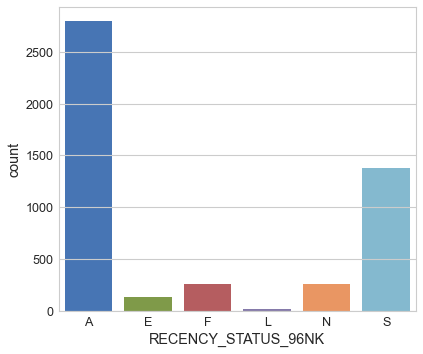

In [554]:
sns.countplot(x='RECENCY_STATUS_96NK', data = donors.loc[(donors.TARGET_D != 0)])
plt.show()

The below bar plot allows us to conclude that even though donors had achieved star status they actually had donated the least (DONATION_TYPE = E) in the last campaign. Active donors represented the group which donated the highest amount (DONATION_TYPE = A ).

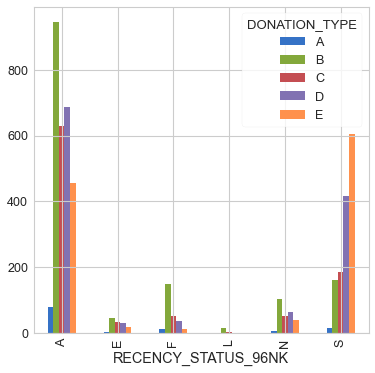

In [555]:
cross_table = pd.crosstab(index=donors.loc[(donors.TARGET_D != 0)]['RECENCY_STATUS_96NK'], columns=donors.loc[(donors.TARGET_D != 0)]["DONATION_TYPE"])
cross_table.plot(kind="bar", figsize=(6,6))
plt.show()

We can assume that the communcation for the campaign was not done via phone due to the fact nearly half of the donors had their phone number published while the remaining did not. Having a phone number in the database seemed not to influence the donation.

In [556]:
donors.loc[(donors.TARGET_D != 0)].TARGET_B.groupby(donors["PUBLISHED_PHONE"]).count()

ValueError: Length of grouper (19372) and axis (4843) must be same length

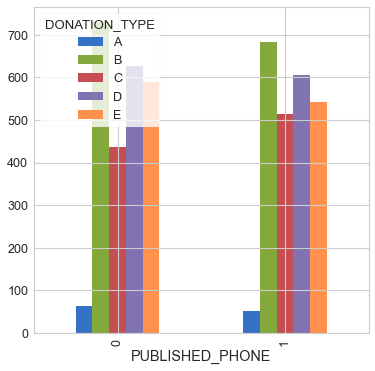

In [557]:
cross_table = pd.crosstab(index=donors.loc[(donors.TARGET_D != 0)]['PUBLISHED_PHONE'], columns=donors.loc[(donors.TARGET_D != 0)]["DONATION_TYPE"])
cross_table.plot(kind="bar", figsize=(6,6))
plt.show()

In [589]:
donors_cat = []
for col in donors.columns:
    if donors[col].dtype.name == "category":
        donors_cat.append(col)
donors_cat

['TARGET_B',
 'IN_HOUSE',
 'URBANICITY',
 'SES',
 'HOME_OWNER',
 'DONOR_GENDER',
 'PUBLISHED_PHONE',
 'MOR_HIT_RATE',
 'RECENCY_STATUS_96NK',
 'FREQUENCY_STATUS_97NK',
 'DONATION_TYPE']

## 4. Visualizing the Data

For this section, we have the goal to go more in depth to generate some insights and/or confirm some assumptions we had about the data.

We have chosen to keep the below scatterplot as it indicates an interesting point which is the fact that a higher amount of card promotions sent in the last 12 months, doesn't necessarily translate into an individual donating more. In fact, the 3 outliers we observe representing the highest donation amounts were made by individuals which were sent 6 or less cards. 

More isn't always better.

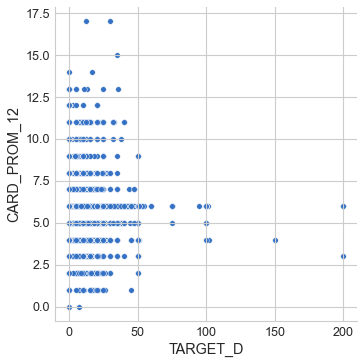

In [559]:
sns.relplot(x="TARGET_D", y="CARD_PROM_12", data=donors)

Adding to the previous point, the below graph illustrates the fact that donors and non-donors followed a relatively similar distribution when it came to the card promotions received (with mean close to 5 calls for both groups) . Thus, receiving more mail, wouldn't necessarily make an individual donate.

In [560]:
donors.loc[(donors.TARGET_B==1)].CARD_PROM_12.mean() #donors avg calls

5.452405533760066

In [561]:
donors.loc[(donors.TARGET_B==0)].CARD_PROM_12.mean() #non donors avg calls

5.338701906531764

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


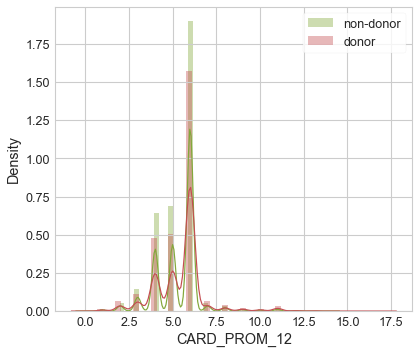

In [562]:
sns.distplot(donors['CARD_PROM_12'][donors['TARGET_B']==0], color='g', label = 'non-donor')
sns.distplot(donors['CARD_PROM_12'][donors['TARGET_B']==1], color='r', label = 'donor')
plt.legend(loc='best')
fig.tight_layout()
plt.show()

In [563]:
#sns.catplot(y="TARGET_B", hue="DONATION_TYPE", kind="count",
 #           palette="pastel", edgecolor=".6",
  #          data=donors)

In [564]:
# sns.scatterplot(x = "MEDIAN_HOUSEHOLD_INCOME", y = 'DONATION_TYPE', hue = "TARGET_B",data = donors, ci=None); 

In [565]:
#sns.swarmplot(x="DONOR_GENDER", y="DONOR_AGE", hue="TARGET_B", data=activedonors, dodge=True, size=10)

The amount of NA's in `DONATION_TYPE` is making it difficult to interpret plots. We will create a subset of the donors dataset with only the non-null values of `DONATION_TYPE`.

In [566]:
activeIndex = []
for i in donors.index:
    if donors["TARGET_D"][i] != 0.0:
        activeIndex.append(i)
        
len(activeIndex)

4843

In [567]:
activedonors = donors.loc[activeIndex]
activedonors.head(2)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
1,1,10.0,79.0,0,R,2,H,M,0,0,334.0,212,72,0,41,S,2,0.235,15.0,0.250,15.0,2,11,14.72,17.0,7,7,122,12,D
7,1,5.0,79.0,0,C,2,H,F,0,0,1004.0,189,95,3,44,A,4,0.400,5.0,0.444,5.0,4,12,5.05,5.0,9,9,91,8,E


Below, it is interesting to point out that even though males are the biggest gender across this dataset, females donors are more frequent than males one, even though the average value of the donation is lower. 

Males donated less frequently but on a higher dollar amount (16.2 dollars compared to $15 from females and unknown).

## wrong plot below..

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


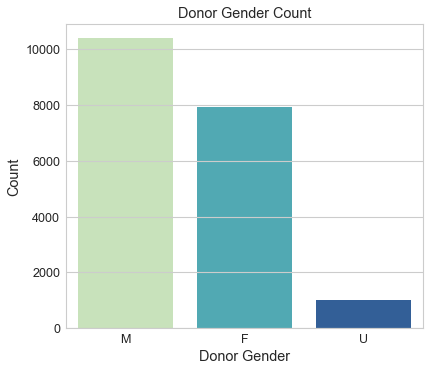

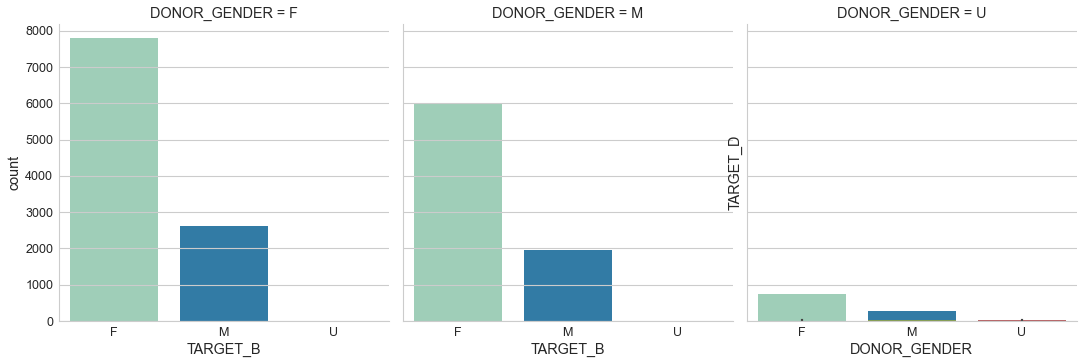

In [568]:
fig,ax = plt.subplots()
sns.barplot(data=donors,x=donors.DONOR_GENDER.unique(), y=donors.DONOR_GENDER.value_counts(),ax=ax, palette='YlGnBu')
ax.set(xlabel='Donor Gender', ylabel='Count',title="Donor Gender Count")
sns.catplot("TARGET_B", col = "DONOR_GENDER", col_wrap = 3,data = donors,kind = "count", palette='YlGnBu')
#sns.catplot("TARGET_D", col = "DONOR_GENDER", col_wrap = 3,data = donors,kind = "bar", palette='YlGnBu')

sns.barplot(y=activedonors.TARGET_D, x= activedonors.DONOR_GENDER, data=activedonors)
plt.show();

In [569]:
activedonors["TARGET_D"].groupby(activedonors["DONOR_GENDER"]).mean().sort_values(ascending=False)

DONOR_GENDER
U    16.313272
M    16.225061
F    15.100774
Name: TARGET_D, dtype: float64

The below plot leaves the question hanging - was last year's card promotion effective? 

As we can observe, the distribution of the lifetime average donation in dollars for donors and non-donors was considerabily similar. This would mean that individuals with similar donation habits, last year acted completely differently. Ideally we would think that the charity organization could detect and target more effeciently those with previous high donation past and get them to donate. 

C:\Users\filip\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\filip\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


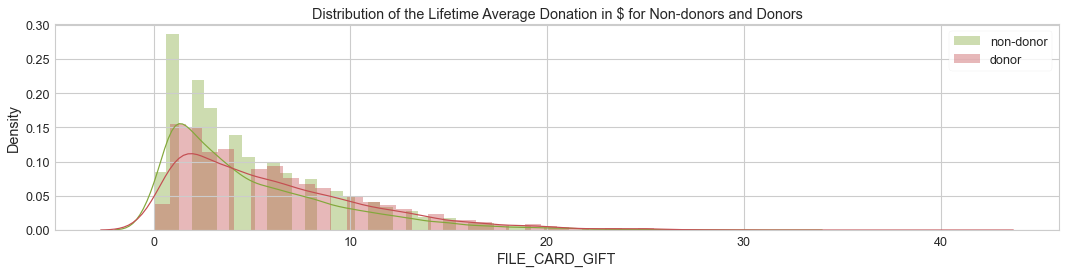

In [570]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))
sns.distplot(donors['FILE_CARD_GIFT'][donors['TARGET_B']==0], color='g', label = 'non-donor')
sns.distplot(donors['FILE_CARD_GIFT'][donors['TARGET_B']==1], color='r', label = 'donor')
plt.legend(loc='best')
plt.title('Distribution of the Lifetime Average Donation in $ for Non-donors and Donors')
fig.tight_layout()
plt.show() 

In [571]:
activedonors["TARGET_D"].groupby(activedonors["FREQUENCY_STATUS_97NK"]).mean().sort_values(ascending=False)

FREQUENCY_STATUS_97NK
1    20.506009
2    16.995739
3    11.440678
4     9.553960
Name: TARGET_D, dtype: float64

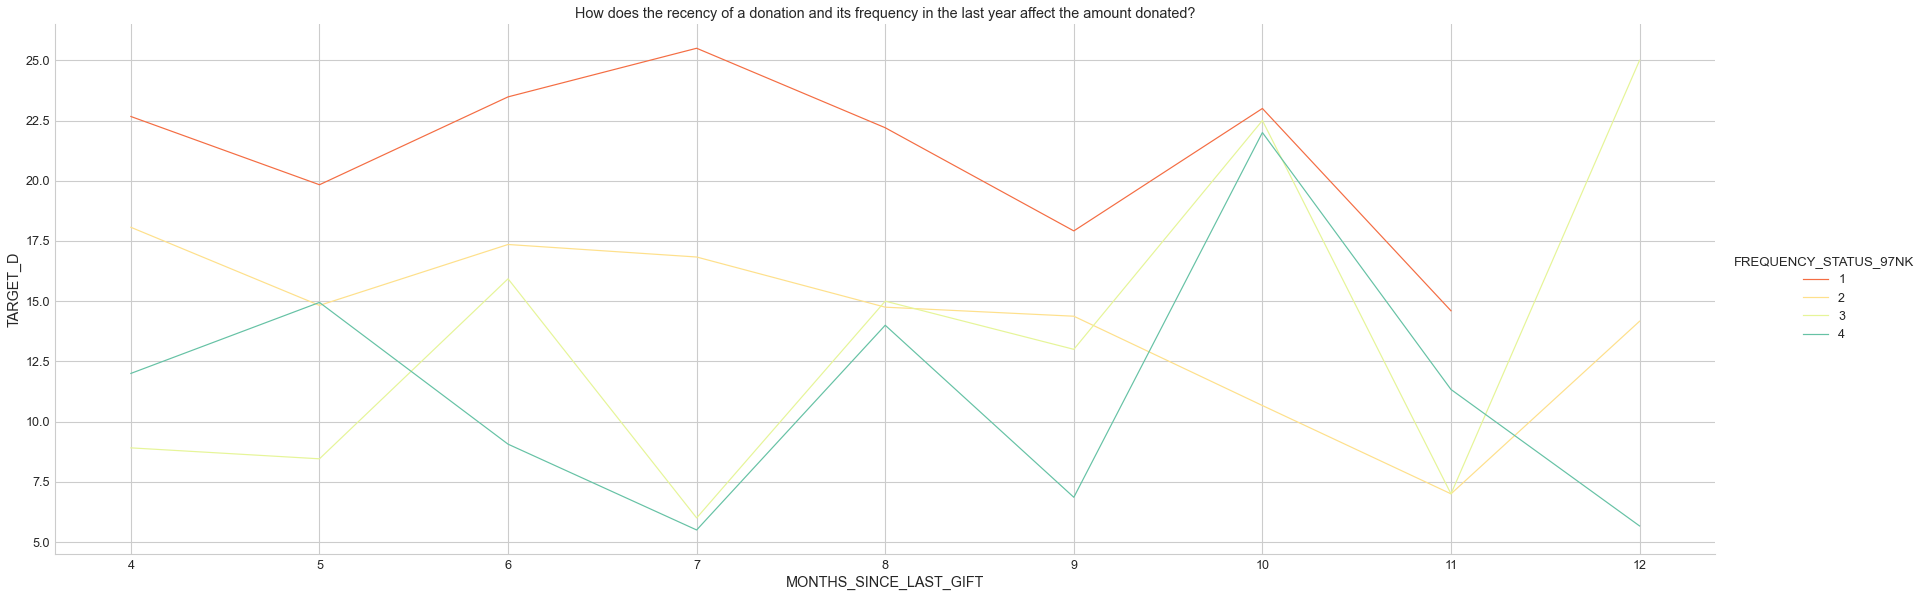

In [572]:
sns.relplot(
    data=activedonors[activedonors.MONTHS_SINCE_LAST_GIFT<=12],
    x="MONTHS_SINCE_LAST_GIFT", y="TARGET_D", hue= 'FREQUENCY_STATUS_97NK', kind='line', facet_kws=dict(sharex=False),
    height=8, aspect=3, ci=None, palette='Spectral')
plt.title('How does the recency of a donation and its frequency in the last year affect the amount donated?')
plt.show();

Generally, higher donations in dollar amount were made by individuals who had donated once in the past 12 months.


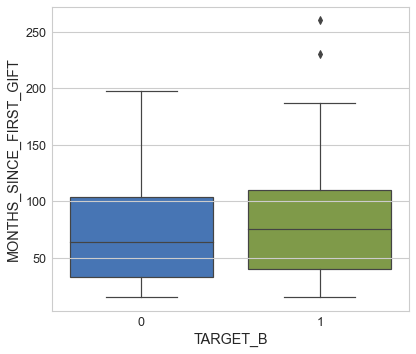

In [573]:
sns.boxplot(x='TARGET_B', y='MONTHS_SINCE_FIRST_GIFT', data=donors)
plt.show()

The box plot above allows us to draw the conclusion that people who donated in the last donation drive have, in general, donated for the first time a longer time ago than non-donors.

In [574]:
def plot_categorical(var, data=donors):
    """
    Creates a count plot, a bar plot for DONATION_TYPE, the mean for TARGET_D and a boxplot for TARGET_D for a 
    categorical variable of the donors dataset. 
    Requires: var is a string, the name of a column of the donors dataset.
    """
    # countplot
    sns.countplot(x=var, data = data)
    plt.show()
    
    # barplot
    cross_table = pd.crosstab(index=data[var], columns=data["DONATION_TYPE"])
    cross_table.plot(kind="bar", figsize=(6,6))
    plt.show()
    
    # boxplot
    sns.boxplot(x=var, y='TARGET_D', data=data)
    plt.show()
    
    # mean
    mean = data["TARGET_D"].groupby(data[var]).mean().sort_values(ascending=False)
    print(mean)

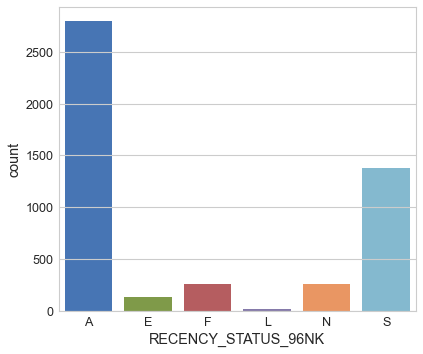

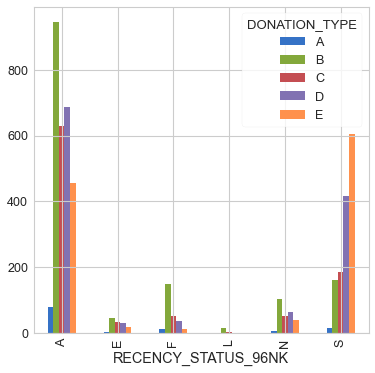

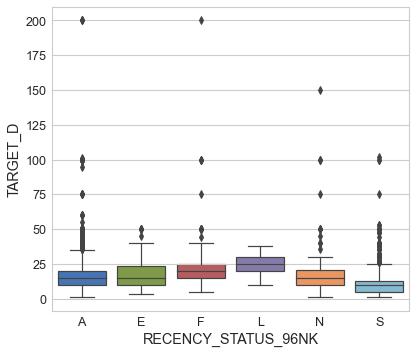

RECENCY_STATUS_96NK
L    24.764706
F    21.729416
N    17.654167
E    17.136364
A    16.995004
S    11.063452
Name: TARGET_D, dtype: float64


In [575]:
plot_categorical('RECENCY_STATUS_96NK',data=activedonors)

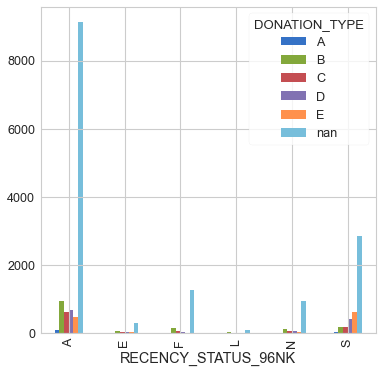

In [576]:
cross_table = pd.crosstab(index=donors['RECENCY_STATUS_96NK'], columns=donors["DONATION_TYPE"])
cross_table.plot(kind="bar", figsize=(6,6))
plt.show()

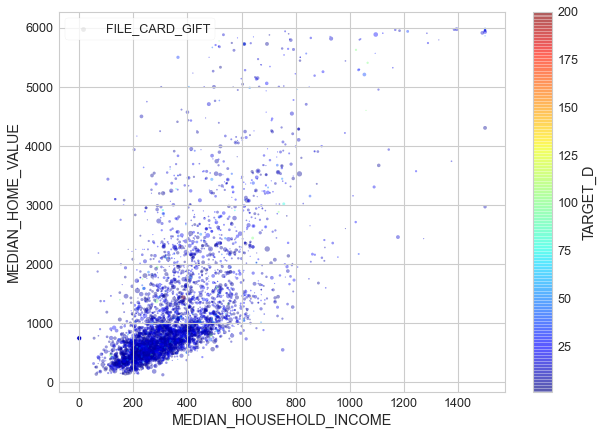

In [577]:
cmap = plt.cm.get_cmap('Reds')
activedonors.plot(kind='scatter',x='MEDIAN_HOUSEHOLD_INCOME', y='MEDIAN_HOME_VALUE', alpha=0.4,
           figsize=(10,7), s=activedonors['FILE_CARD_GIFT'], label='FILE_CARD_GIFT',
           c='TARGET_D',  colorbar=True, colormap='jet',
           sharex=False)
plt.show();

# correct plot below..

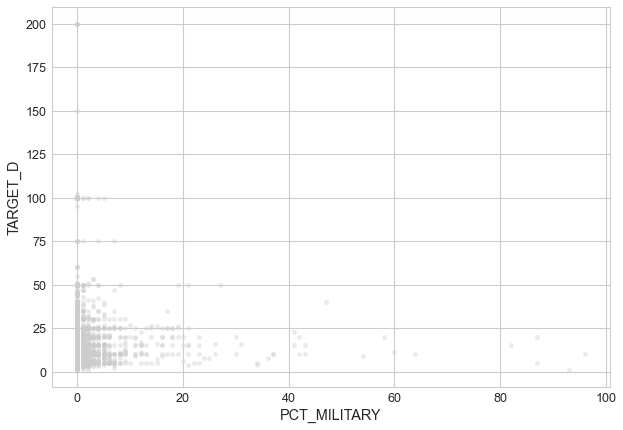

In [584]:
cmap = plt.cm.get_cmap('Reds')
activedonors.plot(kind='scatter',y='TARGET_D', x='PCT_MILITARY', alpha=0.4,
           figsize=(10,7),
           sharex=False)
plt.show();

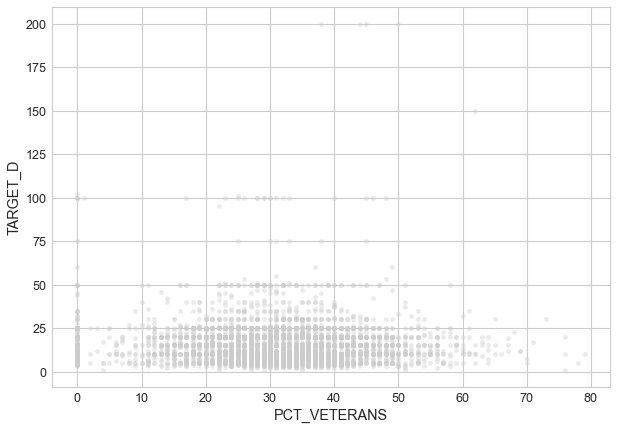

In [585]:
cmap = plt.cm.get_cmap('Reds')
activedonors.plot(kind='scatter',y='TARGET_D', x='PCT_VETERANS', alpha=0.4,
           figsize=(10,7),
           sharex=False)
plt.show();

In [579]:
#sns.scatterplot(data=donors,
 #   x="HOME_OWNER", y="TARGET_B")


#sns.pairplot(donors[['HOME_OWNER','TARGET_D']], hue=donors["TARGET_B"])

## Falta explicar melhor os graficos 

## Task 1 (Supervised Learning) - Predicting Donation and Donation Type

In this task you should target 3 classification tasks:
1. **Predicting  Donation (binary classification task)** - TARGET_B - Hugo; 
2. **Predicting Donation TYPE (multiclass classification)** - DONATION_TYPE - Paulo; and
3. **Train specialized models for SES (socioeconomic classification)** - SES - Filipe.

**You should:**

* Choose **one classifier in each category**: Tree models, Rule models, Linear models, Distance-based models, and Probabilistic models.
* Use cross-validation to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**

# Task 1.1) Predicting Donation (binary classification task) - TARGET_B

We had already previously observed the feature TARGET_B, we were dealing with an imbalanced data set. 
When learning from data sets that contain very few instances of the minority class, in many cases the algorithm tends to favor the majority class while the minority class usually represents the most important concept to be learned (individuals who donated). 

We have chosen to handle the imbalanced data with **SMOTE** (synthetic minority oversampling technique), an oversampling method add samples to original imbalanced dataset to balance the size of the minority and majority classes.

In [586]:
donors.head(2)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
0,0,0.0,87.0,0,S,2,H,M,0,0,554.0,294,76,0,0,A,1,0.067,15.0,0.00,0.0,0,26,8.49,15.0,5,26,92,7,nan
1,1,10.0,79.0,0,R,2,H,M,0,0,334.0,212,72,0,41,S,2,0.235,15.0,0.25,15.0,2,11,14.72,17.0,7,7,122,12,D


In [591]:
#cat features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
cat_features_final = encoder.fit_transform(donors[donors_cat])
column_name = encoder.get_feature_names(donors_cat)
one_hot_encoded_cat =  pd.DataFrame(cat_features_final, columns= column_name)
print(one_hot_encoded_cat.shape)

(19372, 38)


- **Feature Scaling** : As we have vastly different ranges for the numerical data, it is important to scale every value to the same range (0 for the minimum, 1 for the maximum).

In [597]:
numVars = []
for col in donors.columns:
    if donors[col].dtype.name != "category":
        numVars.append(col)

In [598]:
donors_num = donors[numVars]

In [600]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(donors_num)

# creating a scaled dataframe
donors_num_scaled = pd.DataFrame(scaled)
donors_num_scaled.columns = donors_num.columns

In [601]:
donors_num_scaled.shape

(19372, 19)

In [602]:
X = pd.concat([donors_num_scaled, one_hot_encoded_cat], axis=1)

In [603]:
X.head(2)

,TARGET_D,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,TARGET_B_0,TARGET_B_1,IN_HOUSE_0,IN_HOUSE_1,URBANICITY_C,URBANICITY_R,URBANICITY_S,URBANICITY_T,URBANICITY_U,SES_1,SES_2,SES_3,SES_4,HOME_OWNER_H,HOME_OWNER_U,DONOR_GENDER_F,DONOR_GENDER_M,DONOR_GENDER_U,PUBLISHED_PHONE_0,PUBLISHED_PHONE_1,MOR_HIT_RATE_0,MOR_HIT_RATE_1,RECENCY_STATUS_96NK_A,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S,FREQUENCY_STATUS_97NK_1,FREQUENCY_STATUS_97NK_2,FREQUENCY_STATUS_97NK_3,FREQUENCY_STATUS_97NK_4,DONATION_TYPE_A,DONATION_TYPE_B,DONATION_TYPE_C,DONATION_TYPE_D,DONATION_TYPE_E,DONATION_TYPE_nan
0,0.00,1.000000,0.080844,0.196000,0.767677,0.0,0.000000,0.067,0.057692,0.00,0.00,0.000000,0.791667,0.015892,0.033333,0.294118,0.956522,0.314286,0.170732,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.05,0.905882,0.043713,0.141333,0.727273,0.0,0.414141,0.235,0.057692,0.25,0.05,0.222222,0.479167,0.029779,0.037778,0.411765,0.130435,0.436735,0.292683,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [604]:
X.shape

(19372, 57)

In [605]:
y_TARGET_B = donors.TARGET_B
y_TARGET_B

0        0
1        1
2        0
3        0
4        0
        ..
19367    0
19368    0
19369    0
19370    0
19371    1
Name: TARGET_B, Length: 19372, dtype: category
Categories (2, int64): [0, 1]

In [606]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y_TARGET_B.shape))

Shape of X: (19372, 57)
Shape of y: (19372,)


In [ ]:
#!pip install imblearn

# Addressing Class Imbalances

Before OverSampling, counts of label '1': 4843
Before OverSampling, counts of label '0': 14529 



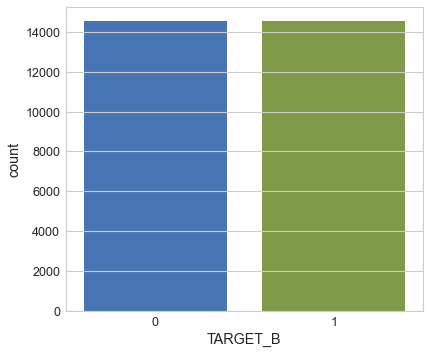

After OverSampling, counts of label '1': 14529
After OverSampling, counts of label '0': 14529


In [607]:
from sklearn.utils import resample


print("Before OverSampling, counts of label '1': {}".format(donors[donors['TARGET_B']==1].shape[0]))
print("Before OverSampling, counts of label '0': {} \n".format(donors[donors['TARGET_B']==0].shape[0]))

# Separating majority and minority classes
df_majority = donors[donors['TARGET_B']==0]
df_minority = donors[donors['TARGET_B']==1]


# Upsampling minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=donors[donors['TARGET_B']==0].shape[0],    # to match majority class
                                 random_state=0) # reproducible results
 
# Combining majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Displaying new class counts
df_upsampled.TARGET_B.value_counts()

# Visualizing new balance
sns.countplot(x=df_upsampled['TARGET_B'])
plt.show()

print("After OverSampling, counts of label '1': {}".format(df_upsampled[df_upsampled['TARGET_B']==1].shape[0]))
print("After OverSampling, counts of label '0': {}".format(df_upsampled[df_upsampled['TARGET_B']==0].shape[0]))

In [608]:
df_upsampled.sort_index(ascending=True).head(2)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
0,0,0.0,87.0,0,S,2,H,M,0,0,554.0,294,76,0,0,A,1,0.067,15.0,0.00,0.0,0,26,8.49,15.0,5,26,92,7,nan
1,1,10.0,79.0,0,R,2,H,M,0,0,334.0,212,72,0,41,S,2,0.235,15.0,0.25,15.0,2,11,14.72,17.0,7,7,122,12,D


## SMOTE - ignorar

In [112]:
"""
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_TARGET_B, test_size=0.2, random_state=0)

print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
"""

'\nfrom imblearn.over_sampling import SMOTE\n\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y_TARGET_B, test_size=0.2, random_state=0)\n\nprint("Shape of X_train: ", X_train.shape)\nprint("Shape of y_train: ", y_train.shape)\nprint("Shape of X_test: ", X_test.shape)\nprint("Shape of y_test: ", y_test.shape)\n'

In [113]:
"""
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))
"""

'\nprint("Before OverSampling, counts of label \'1\': {}".format(sum(y_train==1)))\nprint("Before OverSampling, counts of label \'0\': {} \n".format(sum(y_train==0)))\n\nsm = SMOTE(random_state=2)\nX_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())\n\nprint(\'After OverSampling, the shape of train_X: {}\'.format(X_train_smote.shape))\nprint(\'After OverSampling, the shape of train_y: {} \n\'.format(y_train_smote.shape))\n\nprint("After OverSampling, counts of label \'1\': {}".format(sum(y_train_smote==1)))\nprint("After OverSampling, counts of label \'0\': {}".format(sum(y_train_smote==0)))\n'

# FALTA explicar melhor qual a metric para usar

We will patricularly take a closer look at the **Recall** score, which indicates the % of the passengers who were classified as donors and who had actually donated.

In [609]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [610]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y_TARGET_B, random_state=0, test_size=0.20)

In [611]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [612]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_TARGET_B, test_size=0.2, random_state=0)

<i>**1.1.a) Tree Model - Decision Tree**</i>

We will use grid search with cross-validation (with the help of the GridSearchCV from scikit-learn) to find good hyperparameter values for our DecisionTreeClassifier model.

We will train our model on the full training set using these hyperparameters, and measure then model’s performance on the test set.

In [118]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() 
param_grid = { 'max_depth' : list(range(1, 20)),
             'max_features':list(range(1,50,5)),
             'criterion':list(['gini','entropy'])}        
grid_search_dt= GridSearchCV(dt,param_grid=param_grid,cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                          46]})

In [119]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=11)

In [120]:
grid_search_dt.best_score_

0.7507905776056794

In [124]:
y_pred = grid_search_dt.predict(X_test)

In [125]:
confusion_matrix_test = confusion_matrix(y_pred, y_test) 
print("Confusion Matrix Test Set")
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]
print(confusion_matrix_test)
print("In the test set:")
print(TN,"individuals were correctly classified as 'not-donors' (TN).")
print(TP,"individuals were correctly classified as 'donors' (TP).")
print(FP,"individuals were wrongly classified as 'donors' (FP).")
print(FN,"individuals were wrongly classified as 'not-donors' (FN).")

Confusion Matrix Test Set
[[2905  970]
 [   0    0]]
In the test set:
2905 individuals were correctly classified as 'not-donors' (TN).
0 individuals were correctly classified as 'donors' (TP).
970 individuals were wrongly classified as 'donors' (FP).
0 individuals were wrongly classified as 'not-donors' (FN).


In [127]:
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy = ",((TP+TN)/(TP+TN+FP+FN)))
print("The model predicted {}% of the individuals correctly in the test set.".format(np.round(accuracy_test*100,2)))
precision_test = precision_score(y_test, y_pred)
print("The model predicted correctly that an individual will donate {}% of the times in the test set.".format(np.round(precision_test*100,4)))
recall_test = recall_score(y_test,y_pred)
print("The model predicted the donation of {}% of the passengers who actually donated in the test set.".format(np.round(recall_test*100,4)))
f1_test = f1_score(y_test,y_pred) #F1 score can be interpreted as a weighted average of the precision and recall
#best value F1=1, worst value F1=0
print("The F1 score of the model is",round(f1_test,4))

y_predict_proba = grid_search_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
roc_auc = auc(fpr, tpr)

Accuracy =  0.7496774193548387
The model predicted 74.97% of the individuals correctly in the test set.
The model predicted correctly that an individual will donate 0.0% of the times in the test set.
The model predicted the donation of 0.0% of the passengers who actually donated in the test set.
The F1 score of the model is 0.0


C:\Users\filip\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The 'positive class'/'1' in our model happens when an individual donated, so ideally we want to optimize it for sensitivity (TPR). This is due to the fact that False Positives (donors who are predicted as 'non-donors') are more acceptable than False Negatives ('non-donors' who are predicted as to have 'donors').

However if we want to increase the recall/sensitivy of our model, this may result in a decrease of the precision (depending on the threshold).

**1.1.a) Tree Model - Random Forest**

In [128]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:  5.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [129]:
grid_search_rf.best_score_

0.75027421956329

In [130]:
y_pred_rf = grid_search_rf.predict(X_test)

In [131]:
confusion_matrix_test = confusion_matrix(y_pred_rf, y_test) 
print("Confusion Matrix Test Set")
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]
print(confusion_matrix_test)
print("In the test set:")
print(TN,"individuals were correctly classified as 'not-donors' (TN).")
print(TP,"individuals were correctly classified as 'donors' (TP).")
print(FP,"individuals were wrongly classified as 'donors' (FP).")
print(FN,"individuals were wrongly classified as 'not-donors' (FN).")

Confusion Matrix Test Set
[[2905  970]
 [   0    0]]
In the test set:
2905 individuals were correctly classified as 'not-donors' (TN).
0 individuals were correctly classified as 'donors' (TP).
970 individuals were wrongly classified as 'donors' (FP).
0 individuals were wrongly classified as 'not-donors' (FN).


In [132]:
accuracy_test = accuracy_score(y_test, y_pred_rf)
print("Accuracy = ",((TP+TN)/(TP+TN+FP+FN)))
print("The model predicted {}% of the individuals correctly in the test set.".format(np.round(accuracy_test*100,2)))

precision_test = precision_score(y_test, y_pred_rf)
print("The model predicted correctly that an individual will donate {}% of the times in the test set.".format(np.round(precision_test*100,4)))

recall_test = recall_score(y_test,y_pred_rf)
print("The model predicted the donation of {}% of the passengers who actually donated in the test set.".format(np.round(recall_test*100,4)))

f1_test = f1_score(y_test,y_pred_rf) #F1 score can be interpreted as a weighted average of the precision and recall
#best value F1=1, worst value F1=0
print("The F1 score of the model is",round(f1_test,4))

y_predict_proba_rf = grid_search_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba_rf)
roc_auc = auc(fpr, tpr)

Accuracy =  0.7496774193548387
The model predicted 74.97% of the individuals correctly in the test set.
The model predicted correctly that an individual will donate 0.0% of the times in the test set.
The model predicted the donation of 0.0% of the passengers who actually donated in the test set.
The F1 score of the model is 0.0


C:\Users\filip\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The 'positive class'/'1' in our model happens when an individual donated, so ideally we want to optimize it for sensitivity (TPR).
This is due to the fact that False Positives (donors who are predicted as 'non-donors') are more acceptable than False Negatives ('non-donors' who are predicted as to have 'donors').

However if we want to increase the recall/sensitivy of our model, this may result in a decrease of the precision (depending on the threshold).

<i>**1.1.b) Distance based Model - KNN**</i>

In [133]:
from sklearn.neighbors import KNeighborsClassifier 

In [134]:
knn = KNeighborsClassifier()
param_grid = { 'n_neighbors' : list(range(1, 20)) }

grid_search = GridSearchCV(knn,param_grid=param_grid,cv=3, scoring='recall')
grid_search.fit(X_train_smote, y_train_smote)
pred=grid_search.predict(X_test) 

NameError: name 'X_train_smote' is not defined

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
y_pred_knn=grid_search.predict(X_test) 

In [ ]:
confusion_matrix_test = confusion_matrix(y_pred_knn, y_test) 
print("Confusion Matrix Test Set")
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]
print(confusion_matrix_test)
print("In the test set:")
print(TN,"individuals were correctly classified as 'not-donors' (TN).")
print(TP,"individuals were correctly classified as 'donors' (TP).")
print(FP,"individuals were wrongly classified as 'donors' (FP).")
print(FN,"individuals were wrongly classified as 'not-donors' (FN).")

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_knn)
print("Accuracy = ",((TP+TN)/(TP+TN+FP+FN)))
print("The model predicted {}% of the individuals correctly in the test set.".format(np.round(accuracy_test*100,2)))

precision_test = precision_score(y_test, y_pred_knn)
print("The model predicted correctly that an individual will donate {}% of the times in the test set.".format(np.round(precision_test*100,4)))

recall_test = recall_score(y_test,y_pred_knn)
print("The model predicted the donation of {}% of the passengers who actually donated in the test set.".format(np.round(recall_test*100,4)))

f1_test = f1_score(y_test,y_pred_knn) #F1 score can be interpreted as a weighted average of the precision and recall
#best value F1=1, worst value F1=0
print("The F1 score of the model is",round(f1_test,4))

y_predict_proba_knn = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba_knn)
roc_auc = auc(fpr, tpr)

<i>**1.1.c) Linear Model - Logistic Regression**</i>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
logit_clf = LogisticRegression(random_state=42, solver='liblinear').fit(X_train, y_train)

In [ ]:
y_predict_logit_clf = cross_val_predict(logit_clf, X_train, y_train, cv=10)

In [ ]:
confusion_matrix_test = confusion_matrix(y_predict_logit_clf, y_train) 
print("Confusion Matrix Test Set")
TP = confusion_matrix_test[1, 1]
TN = confusion_matrix_test[0, 0]
FP = confusion_matrix_test[0, 1]
FN = confusion_matrix_test[1, 0]
print(confusion_matrix_test)
print("In the test set:")
print(TN,"individuals were correctly classified as 'not-donors' (TN).")
print(TP,"individuals were correctly classified as 'donors' (TP).")
print(FP,"individuals were wrongly classified as 'donors' (FP).")
print(FN,"individuals were wrongly classified as 'not-donors' (FN).")

In [ ]:
accuracy_test = accuracy_score(y_test, y_pred_knn)
print("Accuracy = ",((TP+TN)/(TP+TN+FP+FN)))
print("The model predicted {}% of the individuals correctly in the test set.".format(np.round(accuracy_test*100,2)))

precision_test = precision_score(y_test, y_pred_knn)
print("The model predicted correctly that an individual will donate {}% of the times in the test set.".format(np.round(precision_test*100,4)))

recall_test = recall_score(y_test,y_pred_knn)
print("The model predicted the donation of {}% of the passengers who actually donated in the test set.".format(np.round(recall_test*100,4)))

f1_test = f1_score(y_test,y_pred_knn) #F1 score can be interpreted as a weighted average of the precision and recall
#best value F1=1, worst value F1=0
print("The F1 score of the model is",round(f1_test,4))

y_predict_proba_knn = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba_knn)
roc_auc = auc(fpr, tpr)

<i>**1.1.d) Rule Model - Naive Bayes**</i>

<i>**1.1.e) Probabilistic Model**</i>

In [ ]:
from sklearn.naive_bayes import GaussianNB

#k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
gnb_clf = GaussianNB()
cross_val_score(gnb_clf, X_train, y_train, cv=10, n_jobs=1)

## Task 1.2) Predicting Donation TYPE (multiclass classification) - DONATION_TYPE

We will now proceed with the classification of a multiclass feature, the "DONATION_TYPE" feature.

This feature was not part of the original dataset, but instead it was created as a way to divide and classify the results according to certain limitings parameters.

###  The Plan/Procedure to be implemented: 

So for this seccion, the multclass classification, the plan will be the following: 

    Step_1: Since the "DONATION_TYPE" has a categorical output (ordinal data in this case), we will first perform a data     encoding procedure.
    
    Step_2: We will examine the "Shape" of the "DONATION_TYPE" data and we will realize that it is unbalanced and as a consecuence we will apply the SMOTE techinique to minimize the problem. 

    Step_3: A set of 5 classifiers types will be chosen and apply to perform classification. This task will include, for each classifiers, the use of the SMOTE and cross-validation techiniques.

    Step_4: At the end of this task, we will compare the overall results and we will summarize the conclusion results. 




## 1.2.1  Preprocessing Data for Multiclass Classification 

We will now do the classification of multiclass feature target "DONATION_TYPE".

We beging this task by enconding the necessary features in order to be able to run the classification models.
Then we will run one algorithm to build our classifier. This will be done five times and we will use a diferent
algorithm for each type of classifier.

Cross validation will be used for each result in order to enhance our models.


In [699]:
## 11 Dez 2020
activeDonors1 = activeDonors
activeDonors.head(10)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
1,1,10.0,79.0,0,R,2,H,M,0,0,334.0,212,72,0,41,S,2,0.235,15.00,0.250,15.0,2,11,14.72,17.0,7,7,122,12,D
7,1,5.0,79.0,0,C,2,H,F,0,0,1004.0,189,95,3,44,A,4,0.400,5.00,0.444,5.0,4,12,5.05,5.0,9,9,91,8,E
9,1,16.0,63.0,0,R,2,H,F,1,0,399.0,307,86,1,33,S,3,0.357,8.60,0.571,8.5,4,11,6.82,8.0,11,9,91,13,C
14,1,3.0,60.0,0,R,2,U,F,1,0,475.0,227,70,0,30,S,2,0.350,10.00,0.500,10.0,5,22,6.00,10.0,9,22,129,14,E
16,1,12.0,81.0,0,R,2,U,M,1,1,530.0,236,81,1,34,A,4,0.500,9.64,0.455,9.8,5,11,9.31,15.0,11,6,89,7,D
20,1,8.0,45.0,0,C,3,H,M,0,1,550.0,387,83,0,49,S,4,0.438,6.14,0.571,6.0,4,13,5.55,7.0,9,5,87,11,E
23,1,15.0,87.0,0,S,2,U,F,0,1,469.0,222,42,0,46,A,2,0.350,12.86,0.364,12.5,4,17,10.88,12.0,11,17,87,10,C
25,1,10.0,77.0,0,T,1,U,U,0,0,2156.0,331,41,0,42,A,2,0.238,14.00,0.500,14.0,5,21,11.63,14.0,11,5,87,11,D
26,1,33.0,37.0,0,C,1,U,F,1,1,1765.0,327,72,0,50,A,4,0.364,25.88,0.455,27.0,5,15,22.38,35.0,11,8,87,7,B
28,1,20.0,30.0,0,T,1,H,M,1,1,1117.0,544,87,1,27,F,1,0.077,20.00,0.200,20.0,1,20,8.44,20.0,5,20,87,1,B


## Step_1 : Data Encoding Process. 

As it was explained previuslly, since we are delaing with a dataframe which has several features as categorical data, we need to encode these features to 
perform the classification.


In [700]:
from sklearn.preprocessing import LabelEncoder

le_TARGET_B = LabelEncoder()        
le_IN_HOUSE = LabelEncoder()                         
le_URBANICITY = LabelEncoder()          
le_SES = LabelEncoder()                              
le_HOME_OWNER = LabelEncoder()                 
le_DONOR_GENDER = LabelEncoder()         
le_PUBLISHED_PHONE = LabelEncoder()       
le_OVERLAY_SOURCE = LabelEncoder()    
le_PEP_STAR = LabelEncoder()
le_RECENCY_STATUS_96NK = LabelEncoder()         
le_DONATION_TYPE =  LabelEncoder()


In [702]:
activeDonors1['TARGET_B'] = le_TARGET_B.fit_transform(activeDonors['TARGET_B'])
activeDonors1['IN_HOUSE'] = le_IN_HOUSE.fit_transform(activeDonors['IN_HOUSE'])
activeDonors1['URBANICITY'] = le_URBANICITY.fit_transform(activeDonors['URBANICITY'])
activeDonors1['SES'] = le_SES.fit_transform(activeDonors['SES'])
activeDonors1['HOME_OWNER'] = le_HOME_OWNER.fit_transform(activeDonors['HOME_OWNER'])
activeDonors1['DONOR_GENDER'] = le_DONOR_GENDER.fit_transform(activeDonors['DONOR_GENDER'])
activeDonors1['PUBLISHED_PHONE'] = le_PUBLISHED_PHONE.fit_transform(activeDonors['PUBLISHED_PHONE'])
#activeDonors1['OVERLAY_SOURCE'] = le_OVERLAY_SOURCE.fit_transform(activeDonors['OVERLAY_SOURCE'])
#activeDonors1['PEP_STAR'] = le_PEP_STAR.fit_transform(activeDonors['PEP_STAR'])
activeDonors1['RECENCY_STATUS_96NK'] = le_RECENCY_STATUS_96NK.fit_transform(activeDonors['RECENCY_STATUS_96NK'])
activeDonors1['DONATION_TYPE'] = le_DONATION_TYPE.fit_transform(activeDonors['DONATION_TYPE'])


C:\Users\filip\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\filip\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\filip\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Once the dataframe has been encoded, we will define the variables needed for the Multiclass Classification.

Being so, we will define our target as the "DONATION_TYPE" and the input will be the remainder of the dataframe.

In [703]:
input = activeDonors1.drop('DONATION_TYPE', axis='columns')
target = activeDonors1["DONATION_TYPE"]

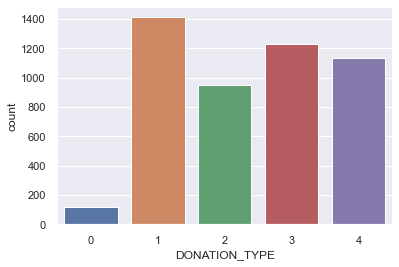

In [704]:
%matplotlib inline
import seaborn as sns; sns.set()

# Visualizing new balance
sns.countplot(x=activeDonors1["DONATION_TYPE"])
plt.show()

In [705]:
target.head(4)

1     3
7     4
9     2
14    4
Name: DONATION_TYPE, dtype: int32

In [706]:
# import warnings
# warnings.filterwarnings('ignore')
# plot_categorical(activeDonors1["DONATION_TYPE"])

## Step_2 : Solving the unbalanced data problem. 

As we previuslly mentioned, we are facing a problem on this dataset. The problem is that unbalanaced distribution of its values. So as a way to solve the problem and prevent this to distorce the results of each of the classifiers, we will try to "equalize" the "target" to be classfied (ie: the "DONATION_TYPE"). 

To do so, we are goig to use the SMOTE Technique. 

The following code will give us a preview/comparion of the result of applying the SMOTE. We will print the before/after results after applying the SMOTE techinque:

In [707]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings('ignore')    
# Loading the dataset 
X = input 
y = target
# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)  
smote = SMOTE()
X_sm , y_sm = smote.fit_sample(X_train , y_train )
#########################################################
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
#########################################################
# summarize distribution
counter = Counter(y_sm)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

ModuleNotFoundError: No module named 'imblearn'

### We clearlly see benefit the efect after applying the SMOTE

In [127]:
#####################################################################################################
# https://machinelearningmastery.com/multi-class-imbalanced-classification/
# https://machinelearningmastery.com/multi-class-imbalanced-classification/
# https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
###################################################################################################

## Step_3 : Selection of 5 classification algorithms and model construction.

The data has been properly encoded and the unbalanced problem is solved. 

So we are now ready for Step_3 of our Multiclass Classification process: We will select 5 classification models, and for each one of them we will run the algorithms and construct the model.

As mentioned before, for each algorithm we 

- The result using the unbalanced data (also performing cross validation)
- The result using the SMOTE technique for balancing the data (with cross validation as well).


### The choosen classifiers algorithms for each category are the following : 

1) Linear models : SVM Model 

2) Probabilistic models : Naive-Bayes Model

3) Tree model : Decision Tree

4) Distance-based models : KNN Model

5) Rule models : Apriori model


## Linear model for Multiclass Classification : SVM Model

The first model will be the SVM. And since we are dealing with multiclass data classification, we will use the One-vs_Rest and the One-vs_One technique.

## Linear models ( SVM Algorithm )

   ### SVM Classifier using a one-vs-rest using unbalanced data, without and with cross validation. 

In [145]:
#####################################################################################################
# 1.1) Linear models : SVM Model Multiclass Classifier using a one-vs-rest --> FINAL 24/12/2020
#####################################################################################################
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier 
from sklearn import svm
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings('ignore')    
# Loading the dataset 
X = input 
y = target
# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)   
## +++
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
## 
# Creating the SVM model 
modelo = OneVsRestClassifier(SVC())    
# Fitting the model with training data 
modelo.fit(X_train, y_train)    
# Making a prediction on the test set 
prediction = modelo.predict(X_test) 
# Evaluating the model 
print(f"Test Set Accuracy : {accuracy_score( y_test, prediction) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}") 
#####################################################
# SVM MODEL FOR UNBALANCED DATA USING CROSS VALIDATION
#####################################################
print ("\n\n Now using the same input we will Cross-validate the results %\n\n")
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 10-fold cross validation
scores = cross_val_score(SVM, X, y, cv=10)
print ( "Cross-validated scores: ", scores)

Test Set Accuracy : 54.23365487674169 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.54      0.97      0.69       271
           2       0.50      0.03      0.06       185
           3       0.51      0.15      0.23       237
           4       0.56      0.92      0.70       219

    accuracy                           0.54       933
   macro avg       0.42      0.41      0.34       933
weighted avg       0.51      0.54      0.43       933



 Now using the same input we will Cross-validate the results %


Cross-validated scores:  [0.29336188 0.27194861 0.30620985 0.29764454 0.2869379  0.29399142
 0.29613734 0.28755365 0.29828326 0.31330472]


### SVM Classifier using a one-vs-rest using SMOTE, without and with cross validation. 

In [148]:
#####################################################################################################
# 1.2) Linear models : SVM Model Multiclass Classifier using a one-vs-rest + Smote--> FINAL 24/12/2020
#####################################################################################################
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier 
from sklearn import svm
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings('ignore')    
# Loading the dataset 
X = input 
y = target
# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)   
## +++
SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
## 
## SMOTE ##
smote = SMOTE()
X_train_sm , y_train_sm = smote.fit_sample(X_train , y_train )
X_test_sm , y_test_sm = smote.fit_sample(X_test , y_test )
###
# Creating the SVM model 
modelo = OneVsRestClassifier(SVC())    
# Fitting the model with training data 
modelo.fit(X_train_sm, y_train_sm)    
# Making a prediction on the test set 
prediction = modelo.predict(X_test_sm) 
# Evaluating the model 
print(f"Test Set Accuracy : {accuracy_score( y_test_sm, prediction) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(y_test_sm, prediction)}") 
#####################################################
# SVM MODEL CROSS VALIDATION
#####################################################
print ("\n\n Now using the same input we will Cross-validate the results %\n\n")
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 10-fold cross validation
scores = cross_val_score(SVM, X, y, cv=10)
print ( "Cross-validated scores: ", scores)

Test Set Accuracy : 51.66051660516605 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.51      0.99      0.68       271
           1       0.42      0.10      0.16       271
           2       0.44      0.27      0.34       271
           3       0.41      0.35      0.38       271
           4       0.64      0.87      0.74       271

    accuracy                           0.52      1355
   macro avg       0.49      0.52      0.46      1355
weighted avg       0.49      0.52      0.46      1355



 Now using the same input we will Cross-validate the results %


Cross-validated scores:  [0.29336188 0.27194861 0.30620985 0.29764454 0.2869379  0.29399142
 0.29613734 0.28755365 0.29828326 0.31330472]


#### As expected, we see a small diference on the results after using the SMOTE technique.

In [ ]:
## https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

In [ ]:
## https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python

In [160]:
#######################################################################################################################
# 1.1.2) Linear models : SVM Model Multiclass Classifier using a one-vs-rest and SMOTE to solve the unbalanced data
#######################################################################################################################
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings('ignore')    
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# Loading the dataset 
X = input 
y = target
# Splitting the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)   

# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

smote = SMOTE ("minority")
X_sm , y_sm = smote.fit_sample(X_train , y_train )

# Creating the SVM model 
modelo = OneVsRestClassifier(SVC())    
# Fitting the model with training data 
modelo.fit(X_train, y_train)    
# Making a prediction on the test set 
prediction = modelo.predict(X_test) 
# Evaluating the model 
print(f"Test Set Accuracy : {accuracy_score( y_test, prediction) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(y_test, prediction)}") 
# print(X.shape , y.shape)
# print(X_sm.shape , y_sm.shape)

#####################################################
# SVM MODEL CROSS VALIDATION
#####################################################
print ("\n\n Now using the same input we will Cross-validate the results %\n\n")
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 10-fold cross validation
scores = cross_val_score(SVM, X_sm, y_sm, cv=10)
print ( "Cross-validated scores: ", scores)


Test Set Accuracy : 54.23365487674169 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.54      0.97      0.69       271
           2       0.50      0.03      0.06       185
           3       0.51      0.15      0.23       237
           4       0.56      0.92      0.70       219

    accuracy                           0.54       933
   macro avg       0.42      0.41      0.34       933
weighted avg       0.51      0.54      0.43       933



 Now using the same input we will Cross-validate the results %


Cross-validated scores:  [0.2742616  0.28481013 0.25738397 0.31223629 0.26793249 0.28481013
 0.28118393 0.26849894 0.28752643 0.26638478]


## SVM Model Results Sumary : 

So, as expected, the cross-validation provided a slightly better result. 

   ##### SVM One-vs-One (without Cross Validation) = 0.2904608788853162
   ##### SVM One-vs-One (Using Cross Validation) = 0.2904608788853162

   ##### SVM One-vs-One (With SMOTE and without Cross Validation) = 0.29184549
   ##### SVM One-vs-One (With SMOTE and performing Cross Validation) = 


## Probabilistic models for Multiclass Classification : Naive-Bayes

Our next model will be  a Probabilistic model, being so we will use Naive Bayes.


In [152]:
############################# NAIVE BAYES ############################################################
#  2) Probabilistic models : Naive-Bayes Model
#####################################################################################################
# importing necessary libraries 

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split   

# train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print ("Multiclass Classifier Naive Bayes Model Accuracy = " , accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

############ Naive Bayes MODEL CROSS VALIDATION ---> FINAL @24_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 10-fold cross validation
scores = cross_val_score(gnb, X_test , y_test, cv=10)
print ( "\n Cross-validated scores: \n\n", scores)


Multiclass Classifier Naive Bayes Model Accuracy =  0.8808911739502999

 Cross-validated scores: 

 [0.88888889 0.85470085 0.86324786 0.8974359  0.82051282 0.8034188
 0.86324786 0.87931034 0.87068966 0.87068966]


In [151]:
############################# NAIVE BAYES ############################################################
#  2) Probabilistic models : Naive-Bayes Model using SMOTE to solve the unbalanced data
#####################################################################################################
# importing necessary libraries 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split   

# train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 


################## SMOTE ####################################
smote = SMOTE()
X_train_sm , y_train_sm = smote.fit_sample(X_train , y_train )
X_test_sm , y_test_sm = smote.fit_sample(X_test , y_test )
#############################################################

# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train_sm, y_train_sm) 
gnb_predictions = gnb.predict(X_test_sm) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test_sm, y_test_sm) 
# print (accuracy) 
  
##### Results using smote

# sm = SMOTE(random_state = 2) 
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
# print('Result using SMOTE, the shape of train_X: {}'.format(X_train_res.shape)) 
# print('Result using SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape)) 

# accuracy on X_test 
accuracy = gnb.score(X_test_sm, y_test_sm) 
print ("\n\n Multiclass Classifier Naive Bayes Model Accuracy using SMOTE:  ", accuracy) 

############ Naive Bayes MODEL CROSS VALIDATION ---> FINAL @24_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 10-fold cross validation
scores = cross_val_score(gnb, X_test_sm, y_test_sm, cv=10)
print ( "\n Cross-validated scores: \n\n", scores)




 Multiclass Classifier Naive Bayes Model Accuracy using SMOTE:   0.8923976608187134

 Cross-validated scores: 

 [0.9122807  0.9005848  0.88888889 0.89473684 0.83040936 0.9005848
 0.90643275 0.94152047 0.88888889 0.94152047]


## Naive Bayes Model Results Summary : 

Again we obtain the same behaviour as with the SVM. As expected, the SMOTE and cross-validation provided a slightly/small better results. 

   #### Naive Bayes (Without Cross Validation) = 0.8808911739502999
   #### Naive Bayes (Using Cross Validation) = 0.88888889

   #### Naive Bayes (With SMOTE without Cross Validation) = 0.8923976608187134
   #### Naive Bayes (With SMOTE and performing Cross Validation) = 0.94152047

## Distance-based models for Multiclass Classification : KNN

We will now build a Distance-based models using the KNN algorithm.


In [155]:
################################### KNN #######################################################
#
###############################################################################################
# importing necessary libraries 

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)  ## 5 = A+B+C+D+E
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print ("\n\n Multiclass Classifier for the KNN Model Accuracy : " , accuracy) 
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

############ CROSS VALIDATION ---> FINAL @09_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(knn, X, y, cv=10)
print ( "\n\n KNN Model with unbalanced data and Cross-validated scores: ", scores)



 Multiclass Classifier for the KNN Model Accuracy :  0.27849185946872324


Cross-validated scores:  [0.2248394  0.29122056 0.2869379  0.26766595 0.29978587 0.29613734
 0.28540773 0.2832618  0.26824034 0.28111588]


In [156]:
################################### KNN #######################################################
#  KNN model using SMOTE
###############################################################################################

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

########################################################
smote = SMOTE()
X_train_sm , y_train_sm = smote.fit_sample(X_train , y_train )
X_test_sm , y_test_sm = smote.fit_sample(X_test , y_test )

########################################################
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_sm, y_train_sm)  ## 5 = A+B+C+D+E
# accuracy on X_test 
accuracy = knn.score(X_test_sm, y_test_sm) 
print ("\n\n Multiclass Classifier for the KNN Model Accuracy : " , accuracy) 
# creating a confusion matrix 
knn_predictions = knn.predict(X_test_sm)  
cm = confusion_matrix(y_test_sm, knn_predictions) 

#######################################

############ CROSS VALIDATION ---> FINAL @09_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(knn, X, y, cv=10)
print ( "\n\n KNN Model using SMOTE and Cross-validated scores: ", scores)



 Multiclass Classifier for the KNN Model Accuracy :  0.252046783625731


Cross-validated scores:  [0.2248394  0.29122056 0.2869379  0.26766595 0.29978587 0.29613734
 0.28540773 0.2832618  0.26824034 0.28111588]


## KNN Model Results Sumary : 

#### KNN (without Cross Validation) =  0.27849185946872324
#### KNN (Using Cross Validation) =  0.29978587

#### KNN (With SMOTE and without Cross Validation) =  0.252046783625731
#### KNN (With SMOTE and performing Cross Validation) = 0.29978587

## Tree models for Multiclass Classification : Decision Tree

Next we will run a Tree mode. For this purpose we will use Decision Tree.

In [157]:
############################## TREE MODEL  ---> FINAL @09_12_2020################
#  
#################################################################################
# importing necessary libraries 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# train and test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training the Classifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

############ TREE MODEL CROSS VALIDATION ---> FINAL @09_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(dtree_model, X, y, cv=10)
print ( "\n Cross-validated scores: \n", scores)


Accuracy: 0.7977720651242503

 Cross-validated scores: 
 [0.80299786 0.80085653 0.80085653 0.80085653 0.80085653 0.80257511
 0.80257511 0.80257511 0.80257511 0.80257511]


[Text(669.6, 906.0, 'X[1] <= 9.5\ngini = 0.8\nsamples = 5075\nvalue = [1015, 1015, 1015, 1015, 1015]'),
 Text(334.8, 543.6, 'gini = 0.0\nsamples = 1015\nvalue = [0, 0, 0, 0, 1015]'),
 Text(1004.4000000000001, 543.6, 'X[1] <= 19.5\ngini = 0.75\nsamples = 4060\nvalue = [1015, 1015, 1015, 1015, 0]'),
 Text(669.6, 181.19999999999993, 'gini = 0.5\nsamples = 2030\nvalue = [0, 0, 1015, 1015, 0]'),
 Text(1339.2, 181.19999999999993, 'gini = 0.5\nsamples = 2030\nvalue = [1015, 1015, 0, 0, 0]')]

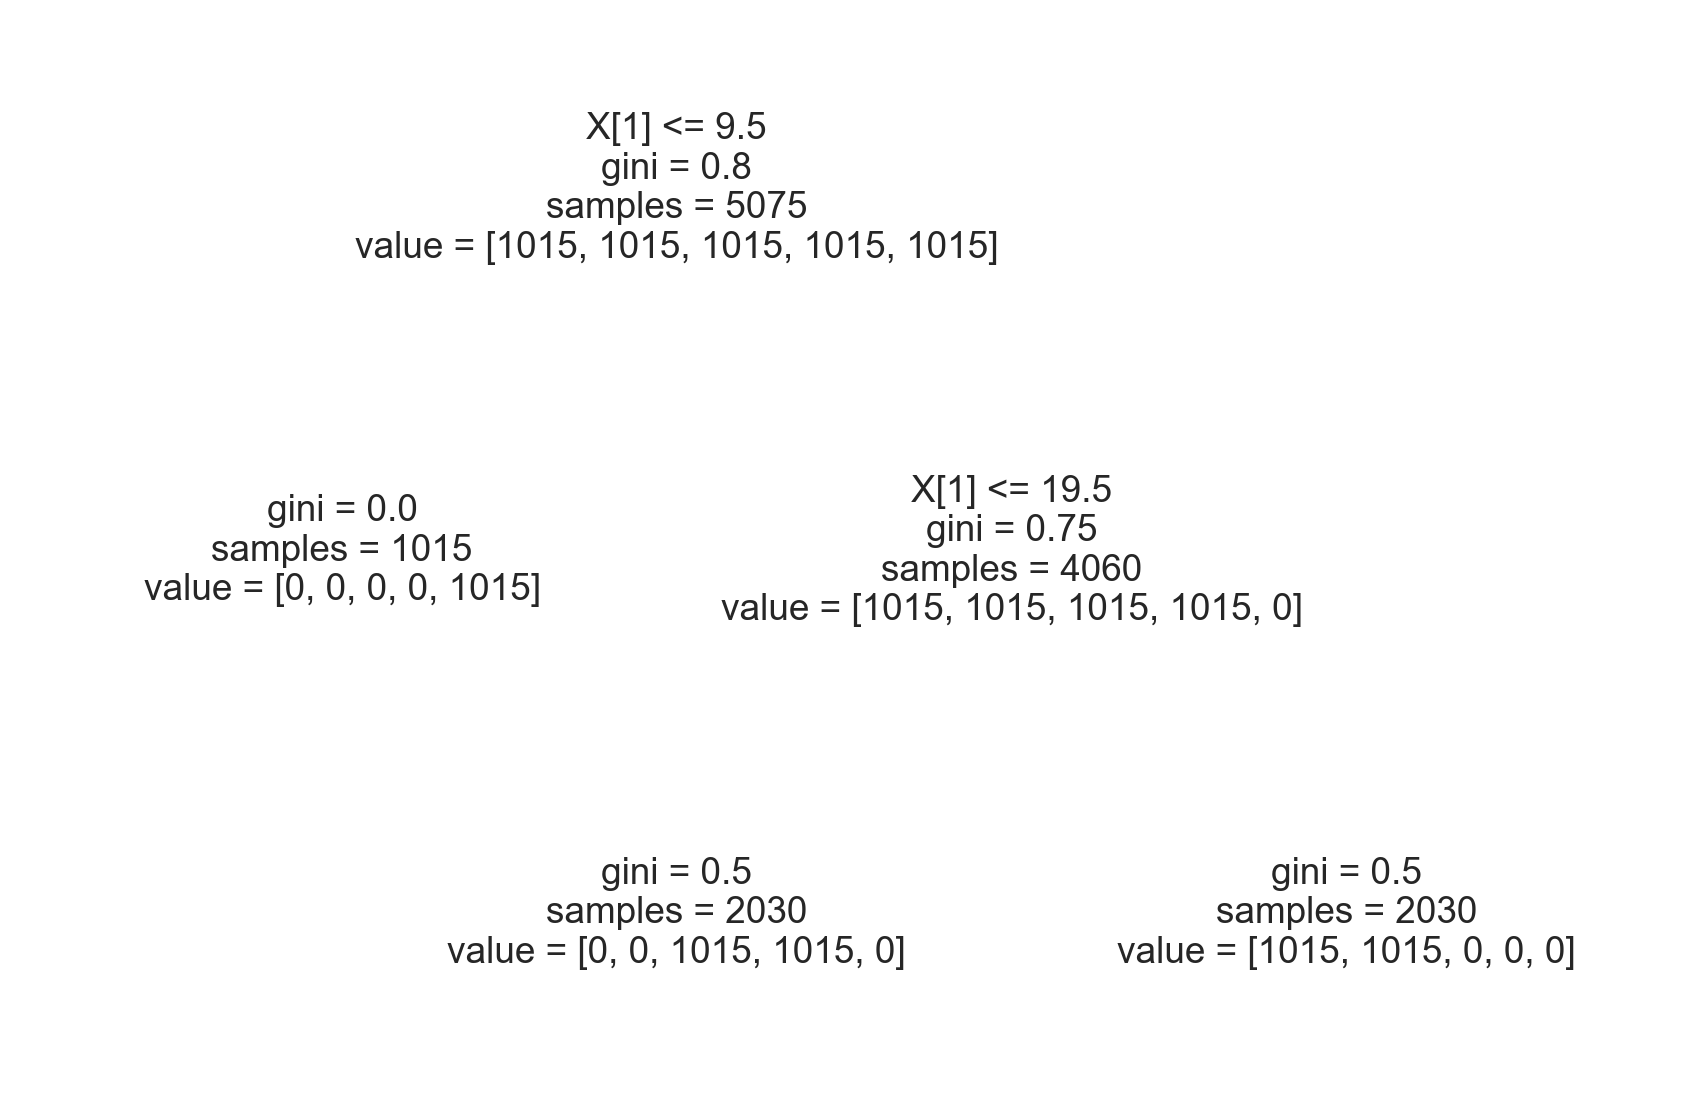

In [163]:
from sklearn import tree
plt.figure(figsize=(30,20))
tree.plot_tree(dtree_model)

In [158]:
############################## TREE MODEL ########################################
#  TREE MODEL Using SMOTE
#################################################################################
# importing necessary libraries 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  
# train and test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

####################################################################################

smote = SMOTE()
X_train_sm , y_train_sm = smote.fit_sample(X_train , y_train )
X_test_sm , y_test_sm = smote.fit_sample(X_test , y_test )

#####################################################################################
  
# training the Classifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train_sm, y_train_sm) 
dtree_predictions = dtree_model.predict(X_test_sm) 
# creating a confusion matrix 
cm = confusion_matrix(y_test_sm, dtree_predictions) 
print("Accuracy:",metrics.accuracy_score(y_test_sm, dtree_predictions))


##### Results using smote

## sm = SMOTE(random_state = 2) 
## X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
## print('Result using SMOTE, the shape of train_X: {}'.format(X_train_res.shape)) 
## print('Result using SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape)) 

############ TREE MODEL CROSS VALIDATION ---> FINAL @09_12_2020 #
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# https://www.aionlinecourse.com/tutorial/machine-learning/k-fold-cross-validation
###################################################
# skl library imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
# Perform 6-fold cross validation
scores = cross_val_score(dtree_model, X, y, cv=10)
print ( "Cross-validated scores: ", scores)


Accuracy: 0.6
Cross-validated scores:  [0.80299786 0.80085653 0.80085653 0.80085653 0.80085653 0.80257511
 0.80257511 0.80257511 0.80257511 0.80257511]


## Decision Tree Model Results Sumary :
    
The final results for compariosn are the following :

#### Tree Model Result (without Cross Validation) =  0.7977720651242503
#### Tree Model Result (Using Cross Validation) =  0.80257511

#### Tree Model Result (With SMOTE and without Cross Validation) =  0.6
#### Tree Model Result (With SMOTE and performing Cross Validation) = 0.80299786

In [ ]:
activeDonors.shape

## Rule models for Multiclass Classification  : Apriori Algorithm

The last model to be built will be the Rule based Model. For this we will use the Apriori Algorithm.

In [164]:
############################### RULES MODEL - APRIORI ################
# 
######################################################################
activeDonors.shape
transactions = []
for i in range(0, activeDonors.shape[0]):
    transactions.append([str(activeDonors.values[i, j]) for j in range(0, 42)])


In [ ]:
print(transactions[0])

In [ ]:
We will now see the Rules/Relations : 
results = list(rules)

...

...

## Task 1.3) Training specialized models for SES (socioeconomic classification) - SES

In [ ]:
donors["SES"].unique()

In [ ]:
ses1 = donors[donors["SES"]==1].drop("TARGET_D", axis=1)
ses2 = donors[donors["SES"]==2].drop("TARGET_D", axis=1)
ses3 = donors[donors["SES"]==3].drop("TARGET_D", axis=1)
ses4 = donors[donors["SES"]==4].drop("TARGET_D", axis=1)

In [ ]:
ses1

In [ ]:
ses2

In [ ]:
ses3

In [ ]:
ses4

In [ ]:
y_SES = donors.SES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_SES, test_size=0.2, random_state=0)

## Task 2 (Unsupervised Learning) - Characterizing Donors and Donation Type

In this task you should **use unsupervised learning algorithms and try to characterize donors (people who really did a donation) and their donation type**. You can use:
* **Association rule mining** to find **associations between the features and the target Donation/DonationTYPE**.
* **Clustering algorithms to find similar groups of donors**. Is it possible to find groups of donors with the same/similar DonationTYPE?
* **Be creative and define your own unsupervised analysis!** What would it be interesting to find out ?

In [613]:
donors.head(5)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
0,0,0.0,87.0,0,S,2,H,M,0,0,554.0,294,76,0,0,A,1,0.067,15.00,0.000,0.00,0,26,8.49,15.0,5,26,92,7,nan
1,1,10.0,79.0,0,R,2,H,M,0,0,334.0,212,72,0,41,S,2,0.235,15.00,0.250,15.00,2,11,14.72,17.0,7,7,122,12,D
2,0,0.0,75.0,0,S,1,H,F,0,0,2388.0,405,63,0,25,S,3,0.409,21.67,0.545,22.67,6,14,16.75,19.0,11,6,105,16,nan
3,0,0.0,60.0,0,U,2,H,F,1,0,1688.0,153,3,0,25,A,3,0.474,13.44,0.400,13.50,4,11,11.76,15.0,11,6,92,12,nan
4,0,0.0,74.0,0,R,2,U,F,1,1,514.0,328,90,0,33,A,1,0.100,17.50,0.111,10.00,1,18,8.83,25.0,6,18,92,3,nan


In [614]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   TARGET_B                     19372 non-null  category
 1   TARGET_D                     19372 non-null  float64 
 2   DONOR_AGE                    19372 non-null  float64 
 3   IN_HOUSE                     19372 non-null  category
 4   URBANICITY                   19372 non-null  category
 5   SES                          19372 non-null  category
 6   HOME_OWNER                   19372 non-null  category
 7   DONOR_GENDER                 19372 non-null  category
 8   PUBLISHED_PHONE              19372 non-null  category
 9   MOR_HIT_RATE                 19372 non-null  category
 10  MEDIAN_HOME_VALUE            19372 non-null  float64 
 11  MEDIAN_HOUSEHOLD_INCOME      19372 non-null  int64   
 12  PCT_OWNER_OCCUPIED           19372 non-null  int64   
 13  P

## 1.1. Preprocessing Data for Association Rule Mining

In [616]:
activeDonors = donors[donors.TARGET_D != 0]
activeDonors.head(2)

,TARGET_B,TARGET_D,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
1,1,10.0,79.0,0,R,2,H,M,0,0,334.0,212,72,0,41,S,2,0.235,15.0,0.250,15.0,2,11,14.72,17.0,7,7,122,12,D
7,1,5.0,79.0,0,C,2,H,F,0,0,1004.0,189,95,3,44,A,4,0.400,5.0,0.444,5.0,4,12,5.05,5.0,9,9,91,8,E


In [617]:
activeDonors2 = activeDonors.drop("TARGET_D", axis=1)
activeDonors2.head(2)

,TARGET_B,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,DONATION_TYPE
1,1,79.0,0,R,2,H,M,0,0,334.0,212,72,0,41,S,2,0.235,15.0,0.250,15.0,2,11,14.72,17.0,7,7,122,12,D
7,1,79.0,0,C,2,H,F,0,0,1004.0,189,95,3,44,A,4,0.400,5.0,0.444,5.0,4,12,5.05,5.0,9,9,91,8,E


In [618]:
#activeCat = activeCat.drop("TARGET_B", axis=1)

### Converting every value to string

There are currently non-string values in the values list. We also should translate 'numerical' strings them to strings that can be understood without looking at the dataframe.

In [626]:
activeDonors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 1 to 19371
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   TARGET_B                     4843 non-null   category
 1   TARGET_D                     4843 non-null   float64 
 2   DONOR_AGE                    4843 non-null   float64 
 3   IN_HOUSE                     4843 non-null   category
 4   URBANICITY                   4843 non-null   category
 5   SES                          4843 non-null   category
 6   HOME_OWNER                   4843 non-null   category
 7   DONOR_GENDER                 4843 non-null   category
 8   PUBLISHED_PHONE              4843 non-null   category
 9   MOR_HIT_RATE                 4843 non-null   category
 10  MEDIAN_HOME_VALUE            4843 non-null   float64 
 11  MEDIAN_HOUSEHOLD_INCOME      4843 non-null   int64   
 12  PCT_OWNER_OCCUPIED           4843 non-null   int64   
 13  PC

In [621]:
def numVars(df):
    '''
    Returns a list of all the numerical features of a dataframe - df.
    '''
    numVars = []
    for col in df.columns:
        if df[col].dtype.name != "category":
            numVars.append(col)
    return numVars

In [623]:
def catVars(df):
    '''
    Returns a list of all the categorical features of a dataframe - df.
    '''
    catVars = []
    for col in df.columns:
        if df[col].dtype.name == "category":
            catVars.append(col)
    return catVars

In [627]:
activeCat = activeDonors2[catVars(activeDonors2)]
vals = activeCat.values.tolist()

In [628]:
idx=0
catDict={}
for col in activeCat.columns:
    catDict[idx]=col
    idx+=1
catDict

{0: 'TARGET_B',
 1: 'IN_HOUSE',
 2: 'URBANICITY',
 3: 'SES',
 4: 'HOME_OWNER',
 5: 'DONOR_GENDER',
 6: 'PUBLISHED_PHONE',
 7: 'MOR_HIT_RATE',
 8: 'RECENCY_STATUS_96NK',
 9: 'FREQUENCY_STATUS_97NK',
 10: 'DONATION_TYPE'}

In [629]:
for row in vals:
    for i in range(len(row)):
        row[i] = str(row[i])   
vals[0]

['1', '0', 'R', '2', 'H', 'M', '0', '0', 'S', '2', 'D']

In [630]:
# target-b values - i=0
for item in vals:
    if item[0] == '1':
        item[0] = 'donor'
    else:
        item[0] = 'non-donor'

In [631]:
# in-house values - i=1
for item in vals:
    if item[1] == '1':
        item[1] = 'inhouse'
    else:
        item[1] = 'not-inhouse'

In [632]:
# urbanicity values - C, R, S, U, T - i=2
for item in vals:
    if item[2] == 'C':
        item[2] = 'city'
    elif item[2] == 'R':
        item[2] = 'rural'
    elif item[2] == 'T':
        item[2] = 'town'
    elif item[2] == 'S':
        item[2] = 'suburban'
    else:
        item[2] = 'urban'

In [633]:
# ses values - i=3
for item in vals:
    if item[3] == '1':
        item[3] = 'ses1'
    elif item[3] == '2':
        item[3] = 'ses2'
    elif item[3] == '3':
        item[3] = 'ses3'
    else:
        item[3] = 'ses4'

In [634]:
# home-owner values - i=4
for item in vals:
    if item[4] == 'H':
        item[4] = 'homeowner'
    else:
        item[4] = 'unknown'

In [635]:
# donor_gender values - i=5
for item in vals:
    if item[5] == 'M':
        item[5] = 'male'
    elif item[5] == 'F':
        item[5] = 'female'
    else:
        item[5] = 'unknown'

In [636]:
# published_phone values - i=6
for item in vals:
    if item[6] == '0':
        item[6] = 'not_published'
    else:
        item[6] = 'published_phone'

In [637]:
# mor_hit_rate - i=7
for item in vals:
    if item[7] == '0':
        item[7] = 'other_non_donor'
    else:
        item[7] = 'other_donor'

In [638]:
# recency-status - S, A, F, N, E, L - i=8
for item in vals:
    if item[8] == 'S':
        item[8] = 'star'
    elif item[8] == 'A':
        item[8] = 'active'
    elif item[8] == 'F':
        item[8] = 'first-time'
    elif item[8] == 'N':
        item[8] = 'star_donor'
    elif item[8] == 'E':
        item[8] = 'inactive'
    else:
        item[8] = 'lapsing'

In [639]:
# frequency status values - i=9
for item in vals:
    if item[9] == '1':
        item[9] = '1_donation'
    elif item[9] == '2':
        item[9] = '2_donations'
    elif item[9] == '3':
        item[9] = '3_donations'
    else:
        item[9] = '4+_donations'

In [640]:
vals[0]

['donor',
 'not-inhouse',
 'rural',
 'ses2',
 'homeowner',
 'male',
 'not_published',
 'other_non_donor',
 'star',
 '2_donations',
 'D']

## 2.2. Finding Associations

### Transforming vals dataframe to a binary database

In [642]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(vals).transform(vals)
binary_database = pd.DataFrame(te_ary, columns=te.columns_)
binary_database

,1_donation,2_donations,3_donations,4+_donations,A,B,C,D,E,active,city,donor,female,first-time,homeowner,inactive,inhouse,lapsing,male,not-inhouse,not_published,other_donor,other_non_donor,published_phone,rural,ses1,ses2,ses3,ses4,star,star_donor,suburban,town,unknown,urban
0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,True,True,False,True,False,True,False,True,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,True,True,True,True,True,False,True,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,True,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True,True,True,False,True,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,True,True,False,True,False,False,True,False,False,False,True,False
4,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,True,False,True,False,True,True,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,False,True,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False
4839,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False
4840,True,False,False,False,False,False,True,False,False,True,False,True,True,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False
4841,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False


### Identifying frequent itemsets using Apriori

In [643]:
from mlxtend.frequent_patterns import apriori

#Compute itemsets with min_support = 50%
frequent_itemsets = apriori(binary_database, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.576915,(active)
1,1.000000,(donor)
2,0.538716,(female)
3,0.559158,(homeowner)
4,0.908321,(not-inhouse)
5,0.505059,(not_published)
6,0.568449,(other_non_donor)
7,0.507537,(ses2)
8,0.576915,"(donor, active)"
9,0.525294,"(not-inhouse, active)"


## 2.3 Association Rules - Results and Discussion 

In [644]:
from mlxtend.frequent_patterns import association_rules
# Generate association rules with confidence >= 90%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(active),(donor),0.576915,1.000000,0.576915,1.000000,1.000000,0.000000,inf
1,(active),(not-inhouse),0.576915,0.908321,0.525294,0.910523,1.002423,0.001270,1.024601
2,(female),(donor),0.538716,1.000000,0.538716,1.000000,1.000000,0.000000,inf
3,(homeowner),(donor),0.559158,1.000000,0.559158,1.000000,1.000000,0.000000,inf
4,(not-inhouse),(donor),0.908321,1.000000,0.908321,1.000000,1.000000,0.000000,inf
5,(donor),(not-inhouse),1.000000,0.908321,0.908321,0.908321,1.000000,0.000000,1.000000
6,(not_published),(donor),0.505059,1.000000,0.505059,1.000000,1.000000,0.000000,inf
7,(other_non_donor),(donor),0.568449,1.000000,0.568449,1.000000,1.000000,0.000000,inf
8,(ses2),(donor),0.507537,1.000000,0.507537,1.000000,1.000000,0.000000,inf
9,(homeowner),(not-inhouse),0.559158,0.908321,0.514144,0.919498,1.012305,0.006249,1.138835


In [645]:
# add new column length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

# filter using pattern length = 2
frequent_2_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
frequent_2_itemsets.sort_values('support', ascending=False)

,support,itemsets,length
12,0.908321,"(not-inhouse, donor)",2
8,0.576915,"(donor, active)",2
14,0.568449,"(donor, other_non_donor)",2
11,0.559158,"(homeowner, donor)",2
10,0.538716,"(donor, female)",2
9,0.525294,"(not-inhouse, active)",2
17,0.522403,"(not-inhouse, other_non_donor)",2
16,0.514144,"(homeowner, not-inhouse)",2
15,0.507537,"(donor, ses2)",2
13,0.505059,"(not_published, donor)",2


After rule association mining, we can identify some associations for `TARGET_B`:
+ `IN_HOUSE`: people who have NEVER donated to the in-house program are more likely to donate.
+ `DONOR_GENDER`: women are more likely to donate.
+ `MOR_HIT_RATE`: people who never responded to another charity's mail are more likely to donate.
+ `RECENCY_STATUS_96NK`: active donors are more likely to donate.
+ `HOME_OWNER`: homeowners are more likely to donate.
+ `PUBLISHED_PHONE`: people who do NOT have their phone published are more likely to donate.
+ `SES`: people who belong to SES group 2 are more likely to donate.

There doesn't seem to be any association between features and a particular donation type.

## 2.4. Preprocessing Data for Clustering

In [661]:
activeDonors2.reset_index(inplace=True, drop=True)

In [662]:
activeDonors2

,TARGET_B,DONOR_AGE,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT
0,1,79.0,0,R,2,H,M,0,0,334.0,212,72,0,41,S,2,0.235,15.00,0.250,15.00,2,11,14.72,17.0,7,7,122,12
1,1,79.0,0,C,2,H,F,0,0,1004.0,189,95,3,44,A,4,0.400,5.00,0.444,5.00,4,12,5.05,5.0,9,9,91,8
2,1,63.0,0,R,2,H,F,1,0,399.0,307,86,1,33,S,3,0.357,8.60,0.571,8.50,4,11,6.82,8.0,11,9,91,13
3,1,60.0,0,R,2,U,F,1,0,475.0,227,70,0,30,S,2,0.350,10.00,0.500,10.00,5,22,6.00,10.0,9,22,129,14
4,1,81.0,0,R,2,U,M,1,1,530.0,236,81,1,34,A,4,0.500,9.64,0.455,9.80,5,11,9.31,15.0,11,6,89,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,1,56.0,0,S,2,U,F,1,1,814.0,498,79,0,28,A,2,0.133,13.00,0.000,0.00,0,18,8.50,16.0,6,18,52,1
4839,1,60.0,0,S,2,U,U,0,0,1073.0,359,68,0,0,A,3,0.211,11.00,0.222,11.00,2,15,9.00,12.0,6,15,44,3
4840,1,80.0,1,S,2,U,F,1,1,318.0,216,65,0,25,A,1,0.105,26.50,0.100,25.00,1,18,21.85,28.0,7,18,101,9
4841,1,70.0,1,S,1,U,M,0,0,538.0,121,29,0,32,A,2,0.190,10.75,0.273,10.67,3,20,9.31,10.0,4,20,63,8


In [647]:
# saving donation type labels for later and removing it from activeDonors
donation_type = activeDonors2.pop("DONATION_TYPE")

In [663]:
# dropping TARGET_B and TARGET_D
dfCluster = activeDonors2.drop("TARGET_B", axis=1)

In [664]:
# Identifying categorical variables
catVars = []
for col in dfCluster.columns:
    if dfCluster[col].dtype.name == "category":
        catVars.append(col)
        
# Identifying numerical variables
numVars = []
for col in dfCluster.columns:
    if dfCluster[col].dtype.name != "category":
        numVars.append(col)

### Scaling numerical data

As we have vastly different ranges for the numerical data, it is important to scale every value to the same range (0 for the minimum, 1 for the maximum).

In [665]:
#Scaling numerical data
clusterNum = dfCluster[numVars]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(clusterNum)

# creating a scaled dataframe
dfScaled = pd.DataFrame(scaled)
dfScaled.columns = clusterNum.columns
dfScaled.head(2)

,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT
0,0.903614,0.035190,0.141333,0.727273,0.00000,0.518987,0.235,0.075,0.250,0.075,0.222222,0.478261,0.027829,0.037778,0.411765,0.130435,0.436735,0.292683
1,0.903614,0.149641,0.126000,0.959596,0.03125,0.556962,0.400,0.025,0.444,0.025,0.444444,0.500000,0.006231,0.011111,0.529412,0.217391,0.310204,0.195122


### One-hot encoding categorical variables

In [666]:
# Using get_dummies
clusterCat = dfCluster[catVars]
clusterCat = pd.get_dummies(clusterCat, drop_first=True)

# converting every value to categorical
for col in clusterCat.columns:
    clusterCat[col] = pd.Categorical(clusterCat[col])

In [669]:
# merging numerical and categorical dataframes
finalDF = dfScaled
for col in clusterCat:
    finalDF[col]=clusterCat[col]
finalDF.head()

,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,IN_HOUSE_1,URBANICITY_R,URBANICITY_S,URBANICITY_T,URBANICITY_U,SES_2,SES_3,SES_4,HOME_OWNER_U,DONOR_GENDER_M,DONOR_GENDER_U,PUBLISHED_PHONE_1,MOR_HIT_RATE_1,RECENCY_STATUS_96NK_E,RECENCY_STATUS_96NK_F,RECENCY_STATUS_96NK_L,RECENCY_STATUS_96NK_N,RECENCY_STATUS_96NK_S,FREQUENCY_STATUS_97NK_2,FREQUENCY_STATUS_97NK_3,FREQUENCY_STATUS_97NK_4
0,0.903614,0.035190,0.141333,0.727273,0.000000,0.518987,0.235,0.0750,0.250,0.0750,0.222222,0.478261,0.027829,0.037778,0.411765,0.130435,0.436735,0.292683,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,0.903614,0.149641,0.126000,0.959596,0.031250,0.556962,0.400,0.0250,0.444,0.0250,0.444444,0.500000,0.006231,0.011111,0.529412,0.217391,0.310204,0.195122,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.710843,0.046293,0.204667,0.868687,0.010417,0.417722,0.357,0.0430,0.571,0.0425,0.444444,0.478261,0.010184,0.017778,0.647059,0.217391,0.310204,0.317073,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0.674699,0.059276,0.151333,0.707071,0.000000,0.379747,0.350,0.0500,0.500,0.0500,0.555556,0.717391,0.008353,0.022222,0.529412,0.782609,0.465306,0.341463,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
4,0.927711,0.068671,0.157333,0.818182,0.010417,0.430380,0.500,0.0482,0.455,0.0490,0.555556,0.478261,0.015746,0.033333,0.647059,0.086957,0.302041,0.170732,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1


## 2.5. Finding Groups

### K-Means

In [670]:
from sklearn.cluster import KMeans

# Defining n_clusters=5 because that's the number of donation types
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans

KMeans(n_clusters=5, random_state=0)

In [671]:
# Train K-means
kmeans = kmeans.fit(finalDF)

In [672]:
kmlabels = kmeans.labels_
kmlabels

array([0, 0, 0, ..., 4, 1, 4])

In [673]:
dontypes = donation_type.values

# counting number of elements in each donation type
types=['A', 'B', 'C', 'D', 'E']
typeCount = {}
for tipo in types:
    count=0
    for val in dontypes:
        if tipo == val:
            count+=1
    typeCount[tipo]=count

typeCount

{'A': 114, 'B': 1413, 'C': 952, 'D': 1232, 'E': 1132}

In [674]:
# counting number of elements in each knn label
kmtypes=[0, 1, 2, 3, 4]
kmCount = {}
for tipo in kmtypes:
    count=0
    for val in kmlabels:
        if tipo == val:
            count+=1
    kmCount[tipo]=count

kmCount

{0: 1030, 1: 879, 2: 903, 3: 1018, 4: 1013}

At first glance, the numbers of elements in the clusters and the original donation types are similar, with the exception of group A, since there is no group with as few elements as this donation type.

## UNBALANCED - TENTAR BALANCEAR

### Hierarchical

In [678]:
from sklearn.cluster import AgglomerativeClustering

hca = AgglomerativeClustering(linkage ="average", n_clusters=5)

# Grow the cluster hierarchy until K = 5
hca = hca.fit(finalDF)

# Cluster memmberships
hca.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## 2.6. Clustering - Results and Discussion 

### K-Means

In [679]:
activeDonors3 = activeDonors.drop(["TARGET_B"],axis=1)
activeDonors3['DONATION_TYPE'] = donation_type
activeDonors3['K-MEANS'] = kmlabels

<AxesSubplot:xlabel='DONATION_TYPE', ylabel='count'>

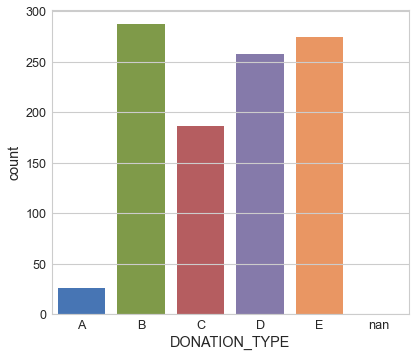

In [680]:
group0 = activeDonors3[activeDonors3['K-MEANS']==0]
sns.countplot(x='DONATION_TYPE', data=group0)

In [681]:
group0.describe()

,TARGET_D,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,K-MEANS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.0
mean,15.161650,59.250485,813.133981,283.767961,70.770874,1.257282,32.447573,0.221211,13.361534,0.269029,10.539505,2.091262,18.642718,11.289592,14.523893,5.433981,17.633981,74.214563,6.292233,0.0
std,13.308091,12.730952,547.642669,92.309202,18.608647,6.791410,9.656524,0.126397,8.523621,0.199175,7.997769,1.711285,3.277648,7.020088,12.675449,1.443800,4.108467,37.805620,5.130090,0.0
min,1.000000,7.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.320000,0.000000,1.000000,4.000000,15.000000,0.000000,0.0
25%,9.000000,55.000000,483.000000,220.000000,65.000000,0.000000,27.000000,0.133000,8.000000,0.111000,5.000000,1.000000,16.000000,6.680000,10.000000,5.000000,16.000000,40.000000,2.000000,0.0
50%,12.000000,60.000000,648.000000,267.000000,75.000000,0.000000,32.000000,0.200000,12.000000,0.250000,10.000000,2.000000,18.000000,9.670000,13.000000,6.000000,18.000000,75.000000,5.000000,0.0
75%,20.000000,66.000000,899.000000,330.000000,83.000000,0.000000,38.000000,0.300000,16.832500,0.400000,15.000000,3.000000,20.000000,14.000000,20.000000,6.000000,19.000000,111.000000,9.000000,0.0
max,200.000000,87.000000,4750.000000,767.000000,99.000000,96.000000,76.000000,0.714000,150.000000,1.000000,60.000000,8.000000,33.000000,98.790000,300.000000,15.000000,27.000000,158.000000,28.000000,0.0


In [682]:
group0.describe(include=['object', 'category'])

,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,DONATION_TYPE
count,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030
unique,2,4,1,2,3,2,2,6,4,5
top,0,R,2,U,F,0,0,A,1,B
freq,954,453,1030,731,574,780,993,571,370,287


Group 0 is very balanced when it comes to donation types. Most of these donors are active, homeowners, have their phone published and were matched against both sources. They have a mean donation amount of 15, a solid amount.

<AxesSubplot:xlabel='DONATION_TYPE', ylabel='count'>

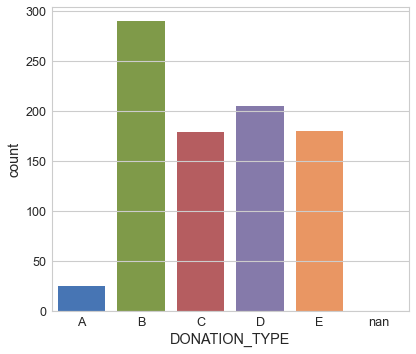

In [683]:
group1 = activeDonors3[activeDonors3['K-MEANS']==1]
sns.countplot(x='DONATION_TYPE', data=group1)

In [684]:
group1.describe()

,TARGET_D,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,K-MEANS
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.00000,879.000000,879.000000,879.0
mean,16.595518,58.031854,1651.878271,445.502844,71.667804,0.889647,27.017065,0.214967,15.245449,0.265461,12.508248,2.028441,18.657565,12.728589,15.949386,5.461889,17.29124,69.638225,5.618885,1.0
std,12.490960,13.881745,1345.012705,220.161764,22.342106,2.638055,13.168556,0.129085,11.078838,0.197114,11.221351,1.610858,3.316269,8.517387,12.103170,1.536375,4.51162,36.000521,4.634884,0.0
min,1.000000,7.000000,220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.810000,0.000000,1.000000,4.00000,15.000000,0.000000,1.0
25%,10.000000,49.000000,737.000000,306.000000,61.000000,0.000000,22.500000,0.125000,9.450000,0.111000,6.000000,1.000000,16.000000,7.900000,10.000000,5.000000,16.00000,40.000000,2.000000,1.0
50%,15.000000,60.000000,1081.000000,406.000000,77.000000,0.000000,29.000000,0.190000,13.000000,0.250000,11.000000,2.000000,18.000000,10.710000,15.000000,6.000000,18.00000,65.000000,4.000000,1.0
75%,20.000000,65.000000,2151.000000,522.000000,89.000000,0.000000,35.000000,0.278000,18.330000,0.375000,16.000000,3.000000,20.000000,15.000000,20.000000,6.000000,19.00000,104.000000,8.000000,1.0
max,102.000000,87.000000,5982.000000,1500.000000,99.000000,23.000000,66.000000,1.000000,100.000000,1.000000,100.000000,9.000000,35.000000,100.000000,133.000000,12.000000,26.00000,187.000000,41.000000,1.0


In [685]:
group1.describe(include=['object', 'category'])

,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,DONATION_TYPE
count,879,879,879,879,879,879,879,879,879,879
unique,2,1,3,2,3,2,2,6,4,5
top,0,S,1,H,F,0,0,A,1,B
freq,779,879,423,440,477,696,729,520,330,290


<AxesSubplot:xlabel='DONATION_TYPE', ylabel='count'>

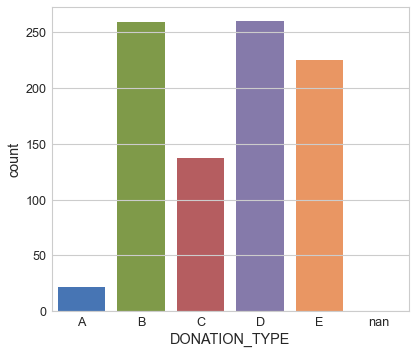

In [686]:
group2 = activeDonors3[activeDonors3['K-MEANS']==2]
sns.countplot(x='DONATION_TYPE', data=group2)

In [687]:
group2.describe()

,TARGET_D,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,K-MEANS
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.0
mean,15.189867,59.879291,1189.640089,322.482835,65.383167,0.671096,29.177187,0.226761,13.835648,0.282131,11.279380,2.159468,18.643411,12.135116,15.172093,5.346622,17.761905,71.770764,6.214839,2.0
std,11.156181,12.024911,1036.834951,167.512800,24.444866,3.030758,12.475326,0.139301,8.169086,0.209226,8.953018,1.712429,3.276805,16.145166,17.117127,1.531092,4.077657,37.114068,5.039569,0.0
min,1.000000,7.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.360000,0.000000,0.000000,4.000000,15.000000,0.000000,2.0
25%,10.000000,55.000000,443.000000,197.000000,52.000000,0.000000,22.000000,0.133000,8.330000,0.125000,5.450000,1.000000,16.000000,6.955000,10.000000,5.000000,16.000000,39.000000,2.000000,2.0
50%,11.000000,60.000000,813.000000,288.000000,74.000000,0.000000,29.000000,0.200000,12.330000,0.250000,10.000000,2.000000,18.000000,10.000000,14.000000,6.000000,18.000000,69.000000,5.000000,2.0
75%,20.000000,66.500000,1526.500000,423.000000,83.000000,0.000000,36.000000,0.286000,17.670000,0.400000,15.000000,3.000000,21.000000,15.000000,20.000000,6.000000,20.000000,105.000000,9.000000,2.0
max,100.000000,87.000000,5795.000000,1329.000000,99.000000,64.000000,79.000000,1.000000,87.500000,1.000000,87.500000,9.000000,33.000000,450.000000,450.000000,17.000000,27.000000,160.000000,29.000000,2.0


In [688]:
group2.describe(include=['object', 'category'])

,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,DONATION_TYPE
count,903,903,903,903,903,903,903,903,903,903
unique,2,5,3,2,3,2,2,6,4,5
top,0,U,1,U,F,0,0,A,1,D
freq,833,255,446,614,502,729,864,476,313,260


<AxesSubplot:xlabel='DONATION_TYPE', ylabel='count'>

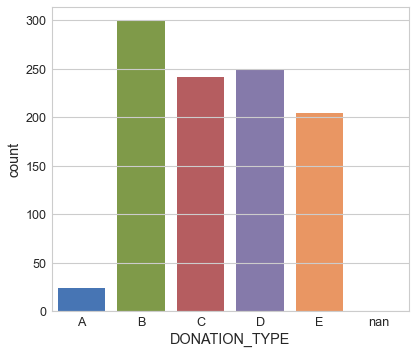

In [689]:
group3 = activeDonors3[activeDonors3['K-MEANS']==3]
sns.countplot(x='DONATION_TYPE', data=group3)

In [690]:
group3.describe()

,TARGET_D,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,K-MEANS
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.0
mean,16.244961,61.127701,1429.733792,408.580550,71.600196,0.824165,31.676817,0.195710,14.694912,0.245148,11.849912,1.943026,18.628684,12.376562,15.987721,5.495088,17.670923,73.781925,5.789784,3.0
std,12.771666,15.307642,1209.982321,194.829275,21.610849,3.127812,10.584244,0.107317,11.616272,0.178545,10.314578,1.590500,3.386253,10.254976,13.542936,1.363406,4.261690,37.706333,4.616568,0.0
min,2.000000,4.000000,139.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,2.260000,0.000000,2.000000,4.000000,15.000000,0.000000,3.0
25%,10.000000,50.000000,634.500000,261.500000,60.000000,0.000000,25.000000,0.111000,9.270000,0.111000,5.400000,1.000000,16.000000,7.577500,10.000000,5.000000,16.000000,40.000000,2.000000,3.0
50%,15.000000,61.000000,1013.500000,394.500000,78.000000,0.000000,31.000000,0.167000,13.000000,0.222000,10.500000,2.000000,18.000000,10.600000,15.000000,6.000000,18.000000,75.000000,5.000000,3.0
75%,20.000000,74.000000,1751.250000,518.000000,89.000000,0.000000,38.000000,0.263000,17.000000,0.364000,15.187500,3.000000,20.000000,15.000000,20.000000,6.000000,20.000000,110.000000,8.000000,3.0
max,200.000000,87.000000,5946.000000,1500.000000,99.000000,42.000000,76.000000,0.650000,200.000000,1.000000,100.000000,8.000000,32.000000,200.000000,219.000000,13.000000,27.000000,230.000000,25.000000,3.0


In [691]:
group3.describe(include=['object', 'category'])

,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,DONATION_TYPE
count,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018
unique,2,5,3,2,3,2,2,6,4,5
top,0,C,1,H,F,1,1,A,1,B
freq,924,324,714,865,540,877,942,630,418,299


<AxesSubplot:xlabel='DONATION_TYPE', ylabel='count'>

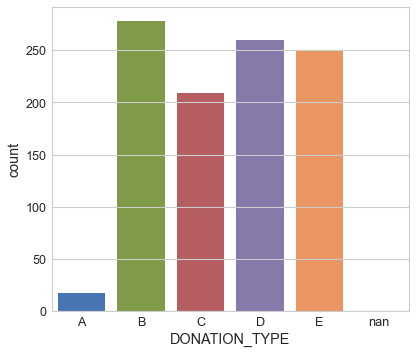

In [692]:
group4 = activeDonors3[activeDonors3['K-MEANS']==4]
sns.countplot(x='DONATION_TYPE', data=group4)

In [693]:
group4.describe()

,TARGET_D,DONOR_AGE,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PCT_OWNER_OCCUPIED,PCT_MILITARY,PCT_VETERANS,RECENT_RESPONSE_PROP,RECENT_AVG_GIFT_AMT,RECENT_CARD_RESPONSE_PROP,RECENT_AVG_CARD_GIFT_AMT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_AVG_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_CARD_GIFT,K-MEANS
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.0
mean,15.015716,61.368213,837.055281,313.672261,71.663376,1.294176,32.725568,0.210363,13.257996,0.257312,10.814235,2.114511,18.630800,10.811698,14.322063,5.514314,17.443238,78.864758,6.607108,4.0
std,12.197584,14.846170,482.828089,93.919838,18.351805,5.390148,10.970573,0.117079,8.235560,0.182645,10.347657,1.676010,3.078023,6.263504,11.713149,1.294196,4.330924,38.044862,4.946515,0.0
min,1.000000,7.000000,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.450000,0.000000,2.000000,4.000000,15.000000,0.000000,4.0
25%,10.000000,51.000000,547.000000,250.000000,63.000000,0.000000,27.000000,0.118000,8.200000,0.111000,5.000000,1.000000,17.000000,6.750000,10.000000,5.000000,16.000000,41.000000,3.000000,4.0
50%,12.000000,61.000000,689.000000,306.000000,77.000000,0.000000,32.000000,0.190000,12.000000,0.250000,10.000000,2.000000,18.000000,9.730000,13.000000,6.000000,18.000000,80.000000,6.000000,4.0
75%,20.000000,73.000000,926.000000,366.000000,85.000000,1.000000,39.000000,0.278000,16.000000,0.400000,15.000000,3.000000,20.000000,13.140000,18.000000,6.000000,19.000000,115.000000,9.000000,4.0
max,200.000000,87.000000,4183.000000,794.000000,99.000000,87.000000,76.000000,0.750000,116.670000,1.000000,200.000000,9.000000,31.000000,103.570000,250.000000,17.000000,27.000000,260.000000,26.000000,4.0


In [694]:
group4.describe(include=['object', 'category'])

,IN_HOUSE,URBANICITY,SES,HOME_OWNER,DONOR_GENDER,PUBLISHED_PHONE,MOR_HIT_RATE,RECENCY_STATUS_96NK,FREQUENCY_STATUS_97NK,DONATION_TYPE
count,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013
unique,2,5,1,2,3,2,2,6,4,5
top,0,T,2,H,F,1,1,A,1,B
freq,909,342,1013,815,516,913,922,597,363,278


### Hierarchical

In [696]:
activeDonors3['HIERARCH']=hca.labels_

In [697]:
hc0 = activeDonors3[activeDonors3['HIERARCH']==0]
hc1 = activeDonors3[activeDonors3['HIERARCH']==1]
hc2 = activeDonors3[activeDonors3['HIERARCH']==2]
hc3 = activeDonors3[activeDonors3['HIERARCH']==3]
hc4 = activeDonors3[activeDonors3['HIERARCH']==4]

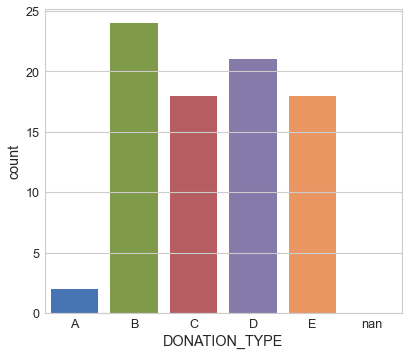

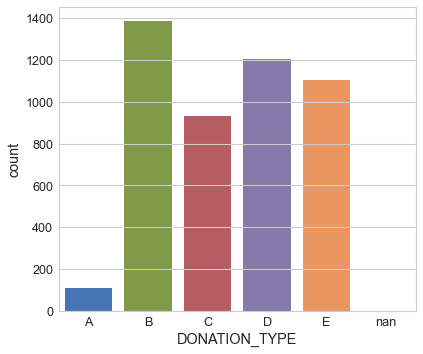

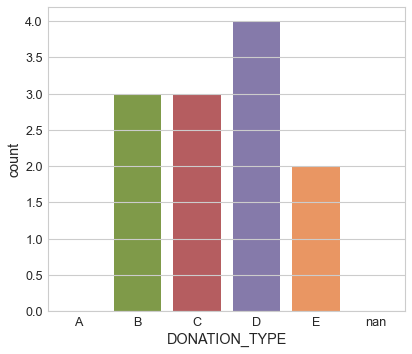

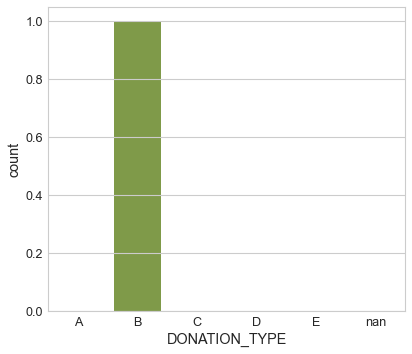

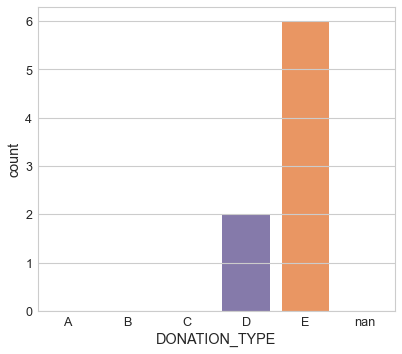

In [698]:
hcGroups = [hc0, hc1, hc2, hc3, hc4]
for group in hcGroups:
    sns.countplot(x='DONATION_TYPE', data=group)
    plt.show()

# 3. Final Comments and Conclusions